In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import datetime

# Data Cleaning & Processing


In [40]:
# Load the Spotify dataset
file_path = '/content/spotify-2023.csv'
# ISO-8859-1 encoding specifies character encoding used to read the CSV file attached to this project (something I had to look up and understadn)
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

df.info()

# Data Cleaning & Processing
# Removing one anomaly from the dataset - Love Grows (Where My Rosemary Goes) has its musical characteristics in the place of its strem count. Thus we will be dropping this row from our analysis
df = df.drop(index = 574)

# From an initial look over the data, several key values are missing and the C key in the dataset is not present.
# After cross checking a few of the songs online, we will assume the missing null values are
df['key'].fillna('C', inplace=True)

# Check for missing values and handle them (example: dropping)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [41]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    902.000000     902.000000      902.000000    902.000000   
mean       1.566519    2018.480044        6.035477     13.920177   
std        0.888644      10.802595        3.561551      9.199132   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.250000        3.000000      6.000000   
50%        1.000000    2022.000000        5.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            902.000000         902.000000          902.000000   
mean            4800.009978          11.882483           60.536585   
std             7614.429777          19.155985           75.092708   
min               31.000000           0.000000            0.000000   
25%              845.500000           0.000000           12.000000   
50%             2008.500000           3.000000           32.000000   
75%             4892.250000          16.000000           80.000000   
max            52898.000000         147.000000          532.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       902.000000        902.000000  902.000000      902.000000   
mean         50.186253          2.525499  122.390244       67.169623   
std          49.748855          5.751698   27.889401       14.650688   
min           0.000000          0.000000   65.000000       23.000000   
25%           6.250000          0.000000   99.000000       57.000000   
50%          35.000000          0.000000  120.000000       69.000000   
75%          84.000000          2.000000  140.000000       78.000000   
max         275.000000         58.000000  206.000000       96.000000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  902.000000  902.000000      902.000000          902.000000  902.000000   
mean    51.319290   64.329268       26.772727            1.644124   18.194013   
std     23.514183   16.615225       25.869141            8.624666   13.725833   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       17.000000            0.000000   12.000000   
75%     70.000000   77.000000       42.000000            0.000000   23.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     902.000000  
mean       10.288248  
std        10.064777  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        12.000000  
max        64.000000

# Data Manipulation

In [42]:
# Creating a new column 'streams-per-month' based on the months since the song released
# This allows some sort of standardization across the data as the songs are released in different years and different months

# Ensure the 'released_year' and 'released_month' columns are of integer type for calculation
df['released_year'] = df['released_year'].astype(int)
df['released_month'] = df['released_month'].astype(int)

current_year = 2023
current_month = 12
df['months-since-release'] = ((current_year - df['released_year']) * 12) + (current_month - df['released_month'])
df['streams'] = df['streams'].astype('int')
df['streams-per-month'] = df['streams'] / df['months-since-release']
df['streams-per-month'] = df['streams-per-month'].astype('int')

# Convert release date columns to a single datetime column
# Convert 'released_year', 'released_month', 'released_day' columns to strings
df['released_year'] = df['released_year'].astype(str)
# Ensure month is two digits
df['released_month'] = df['released_month'].astype(str).str.zfill(2)
# Ensure day is two digits
df['released_day'] = df['released_day'].astype(str).str.zfill(2)

# Combine the string columns and convert to datetime
df['release_date'] = pd.to_datetime(df['released_year'] + '-' + df['released_month'] + '-' + df['released_day'])

# Show the cleaned data
df.head(10)

track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas   

   artist_count released_year released_month released_day  \
0             2          2023             07           14   
1             1          2023             03           23   
2             1          2023             06           30   
3             1          2019             08           23   
4             1          2023             05           18   
5             2          2023             06           01   
6             2          2023             03           16   
7             1          2023             07           07   
8             1          2023             05           15   
9             2          2023             03           17   

   in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
0                   553                147  141381703                  43   
1                  1474                 48  133716286                  48   
2                  1397                113  140003974                  94   
3                  7858                100  800840817                 116   
4                  3133                 50  303236322                  84   
5                  2186                 91  183706234                  67   
6                  3090                 50  725980112                  34   
7                   714                 43   58149378                  25   
8                  1096                 83   95217315                  60   
9                  2953                 44  553634067                  49   

   ...  danceability_% valence_%  energy_% acousticness_%  instrumentalness_%  \
0  ...              80        89        83             31                   0   
1  ...              71        61        74              7                   0   
2  ...              51        32        53             17                   0   
3  ...              55        58        72             11                   0   
4  ...              65        23        80             14                  63   
5  ...              92        66        58             19                   0   
6  ...              67        83        76             48                   0   
7  ...              67        26        71             37                   0   
8  ...              85        22        62             12                   0   
9  ...              81        56        48             21                   0   

  liveness_% speechiness_%  months-since-release  streams-per-month  \
0          8             4                     5           28276340   
1         10             4                     9           14857365   
2         31             6                     6           23333995   
3         11            15                    52           15400784   
4         11             6                     7           43319474   
5          8            24                     6           30617705   
6          8             3                     9           80664456   
7         11             4                     5           11629875   
8         28             9                     7           13602473   
9          8            33                     9           61514896   

   release_date  
0    2023-07-14  
1    2023-03-23  
2    2023

# Data Visualization

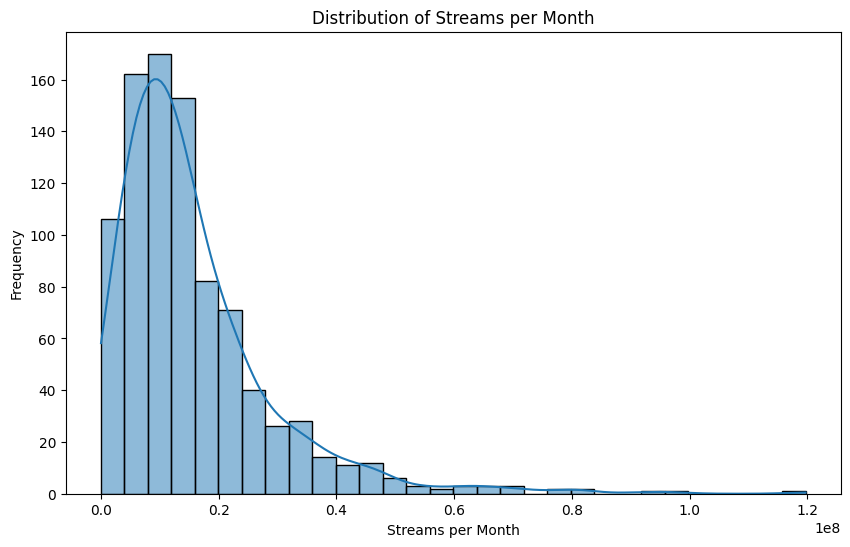

In [43]:
# Distribution of streams per month
plt.figure(figsize=(10, 6))
sns.histplot(df['streams-per-month'], bins=30, kde=True)
plt.title('Distribution of Streams per Month')
plt.xlabel('Streams per Month')
plt.ylabel('Frequency')
plt.show()

From our first graph analysis, it is evident that we have a right-skewed graph emphasizing that streams per month begin to taper off as we reach a higher amount of streams.

We also see that the max amount of streams per month occurs around 100,000 streams per month with a frequency of ~170

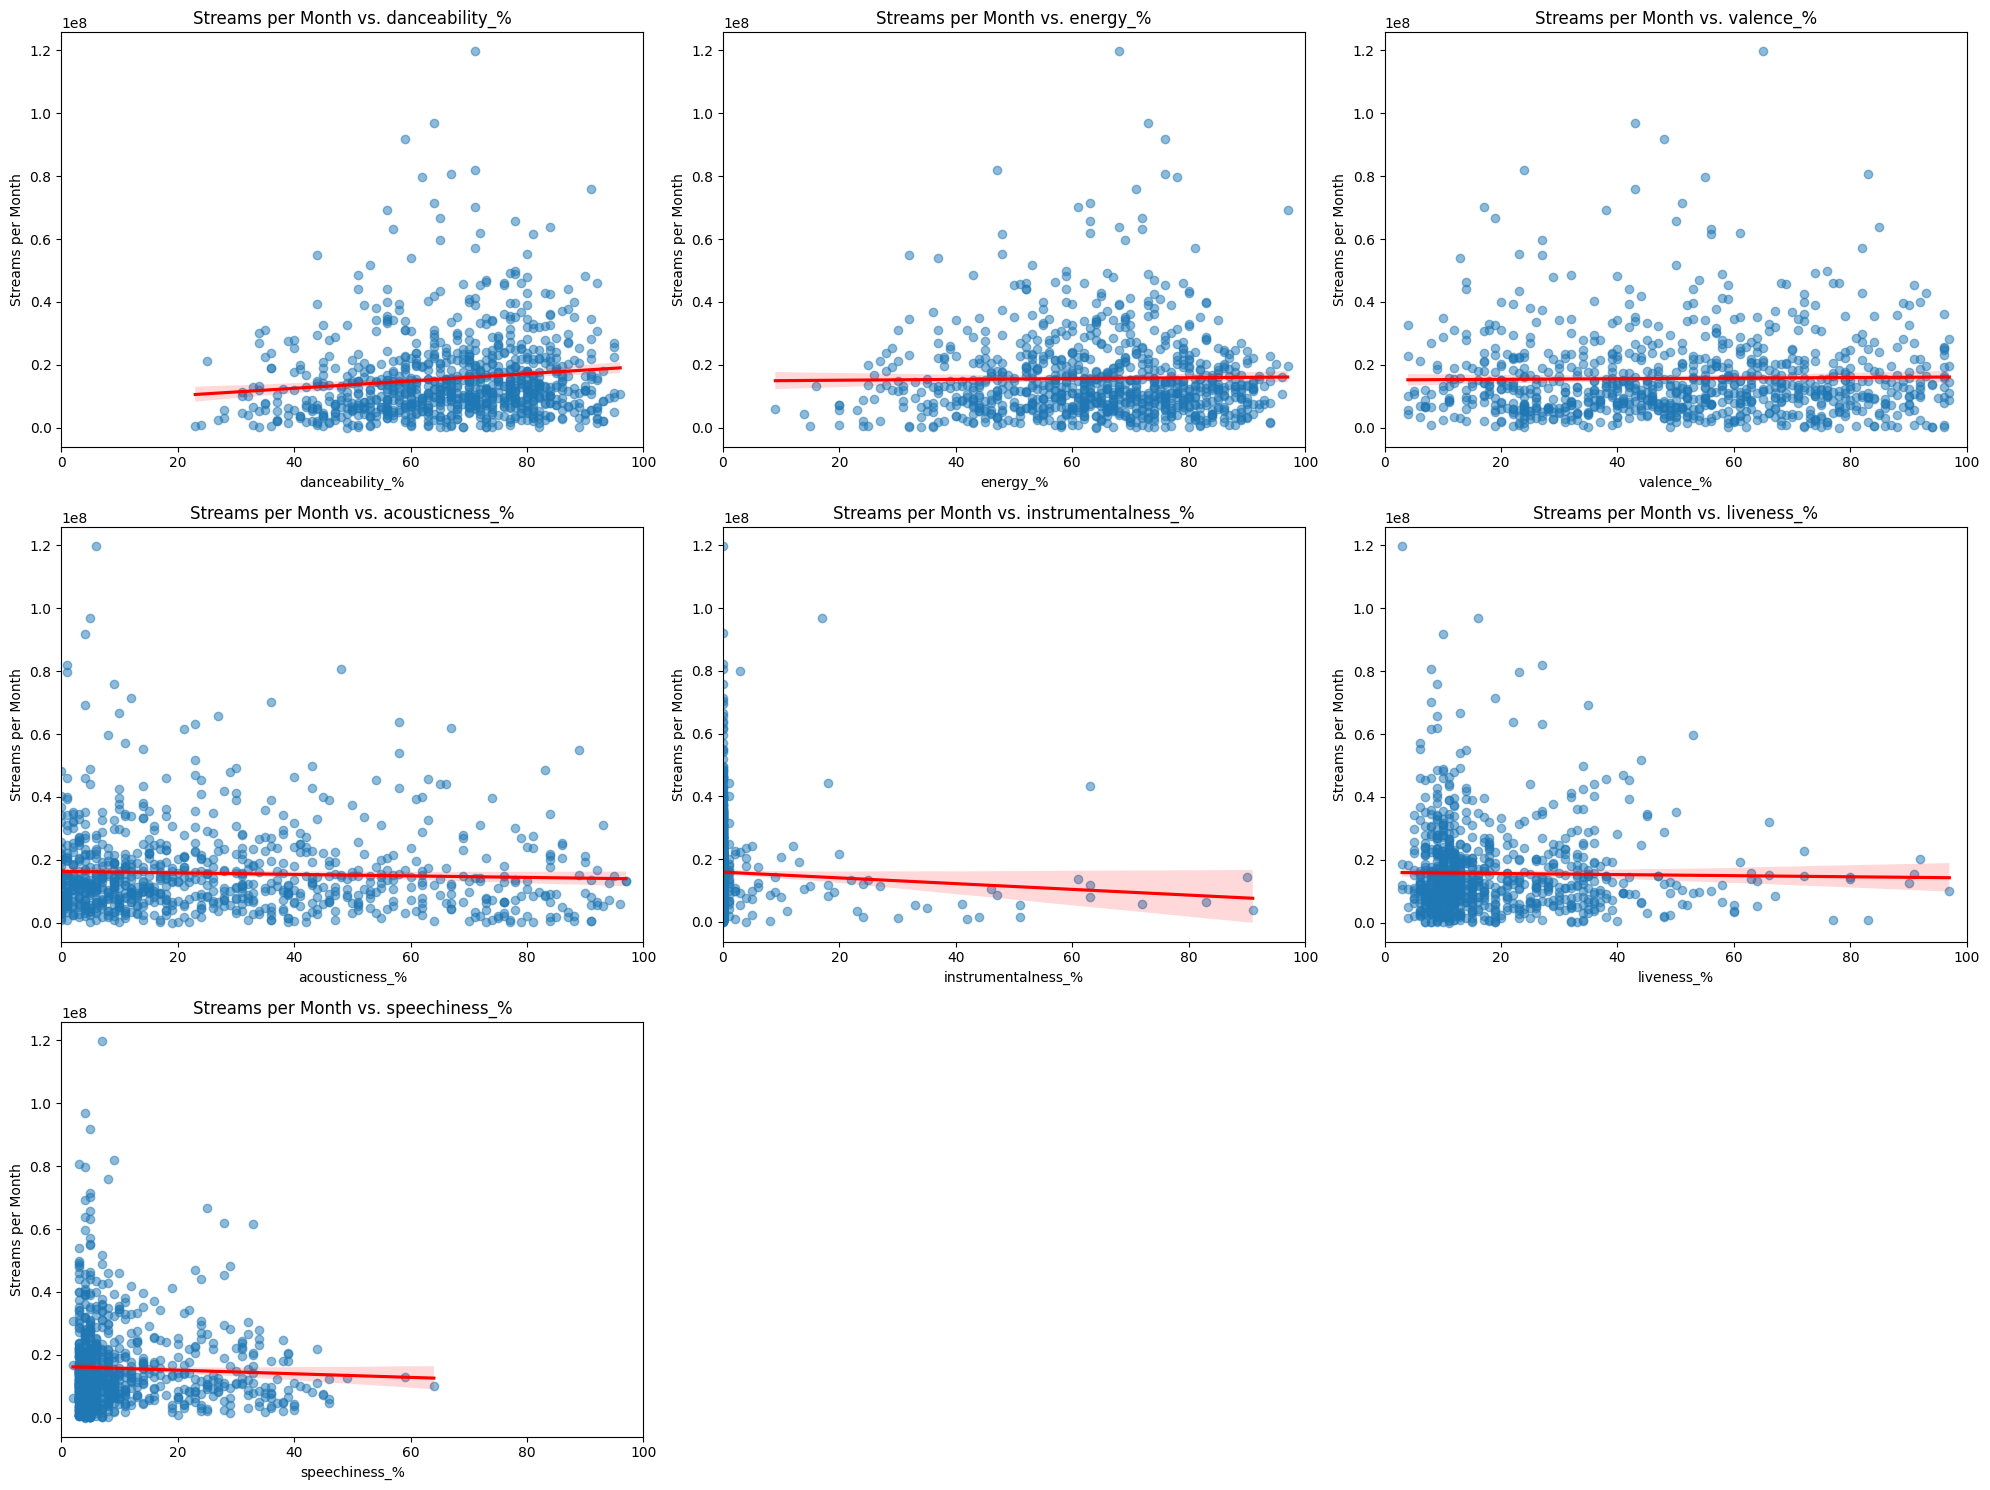

In [44]:
# Attributes to plot
attributes = [
    'danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Create a 3x3 grid of subplots (the last two will be empty for the 7 attributes)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through the attributes and create scatter plots with regression lines
for i, attribute in enumerate(attributes):
    ax = axes[i]
    sns.regplot(x=df[attribute], y=df['streams-per-month'], ax=ax, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    ax.set_title(f'Streams per Month vs. {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Streams per Month')
    # Start x-axis at 0
    ax.set_xlim(left=0)
    ax.set_xlim(right=100)

# Remove the last two (unused) subplots for 7 attributes
fig.delaxes(axes[7])
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()


From the graphs, we can see the following:


> Most of the 7 attributes result in a near zero correlation or a slight positive correlation such as danceabilty% or slight negative correlation like instrumentalness.

> Danceability is the only graph that has no data points below 20%. This means that no song in the top 1000 list are less than 20% danceable

> Energy is very simliar to danceability but scattered across the x-axis

> Valance is the most evenly distributed and the attribute with the closest to zero correlation

> Acousticenss is also seen to be across the spectrum; however, songs with less acousticness seem to do better in the top 1000

> Instrumentalness seems to have a majority of the songs near 0, meaning that most of the songs in the top 1000 do have vocals

> liveness also has a majority of songs under 20%, meaning that most songs are recorded in a studio rather than live

> Speechiness also has a large portion under 20% but it is still spread out until roughly the 65%. This means that while most songs have vocals, not all include only words and could also be other forms of vocal contribution.

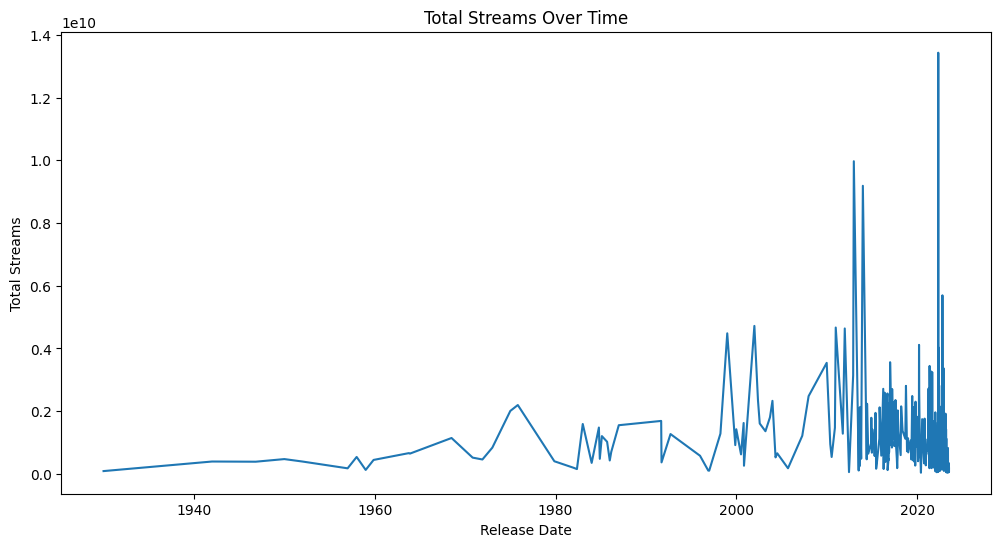

In [45]:
# Grouping data by release date and summing streams
time_series = df.groupby('release_date')['streams'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='streams', data=time_series)
plt.title('Total Streams Over Time')
plt.xlabel('Release Date')
plt.ylabel('Total Streams')
plt.show()

Noting that the data is coming from a 2023 Spotify Song analysis, it is not suprising for the most streams to occur recently as that is when the most popular songs were released

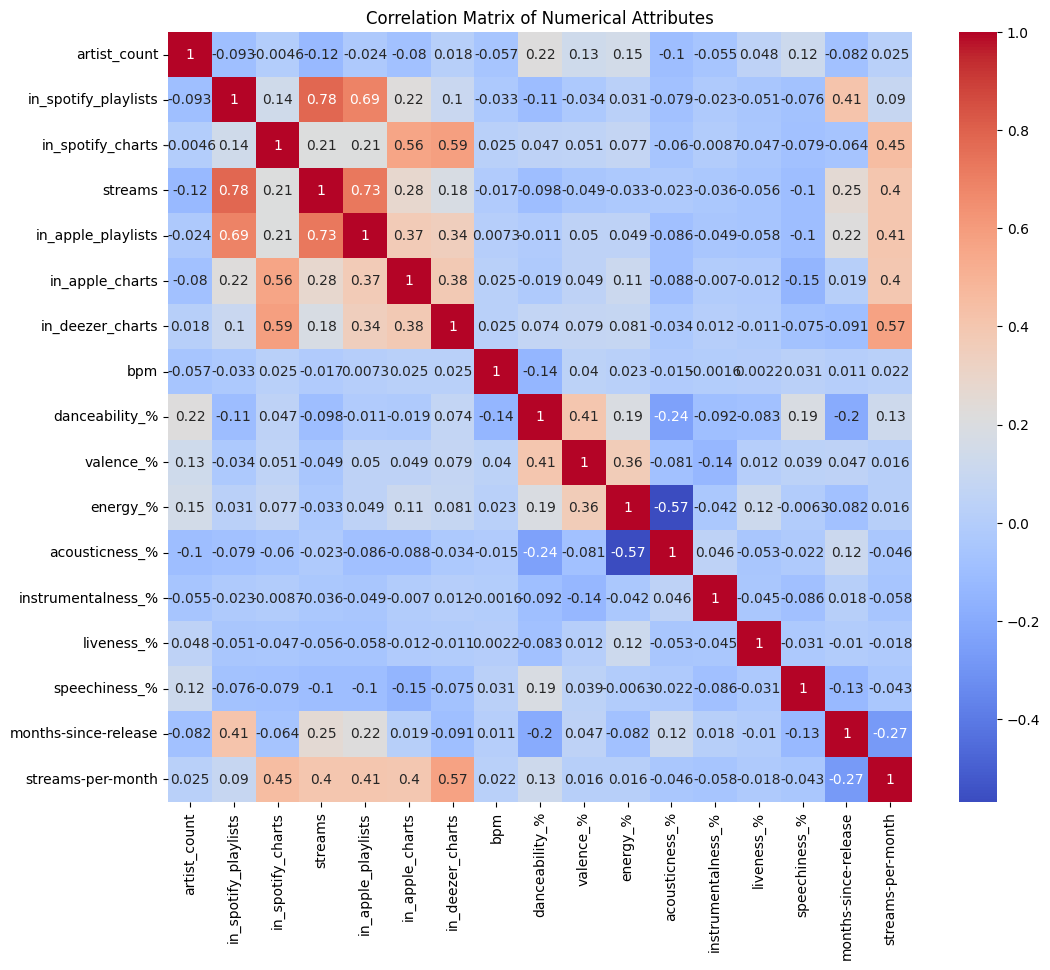

In [46]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()


From this correlation chart, it is evident that a large majority of the correlations are near 0 meaning there is limited correlation

However, one area we do see strong correlation is if the song was in a spotify, apple, or deezer chart, it is most likely also going to be in the charts of the other platforms as well.

Acousticness and instrumentalness have the strongest negative correlation.

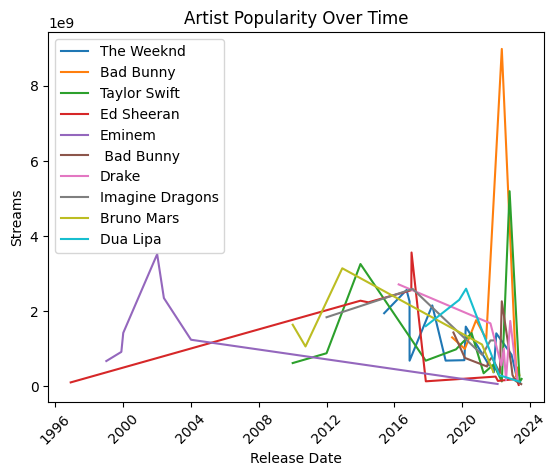

In [47]:
# Split and explode 'artist(s)_name' as in your original code
df['artists'] = df['artist(s)_name'].str.split(',')
df_exploded = df.explode('artists')

# Group by artists and release date, then sum streams
artist_popularity = df_exploded.groupby(['artists', 'release_date'])['streams'].sum().reset_index()

# Find top 10 artists for simplicity in plotting
top_artists = artist_popularity.groupby('artists')['streams'].sum().nlargest(10).index

# Filter data for only top artists
top_artist_popularity = artist_popularity[artist_popularity['artists'].isin(top_artists)]

# Plotting
for artist in top_artists:
    artist_data = top_artist_popularity[top_artist_popularity['artists'] == artist]
    plt.plot(artist_data['release_date'], artist_data['streams'], label=artist)

plt.xlabel('Release Date')
plt.ylabel('Streams')
plt.title('Artist Popularity Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Similar to the total streams over time graph, it is not surprising to see most of the artists be popular in the recent years as that is when most of the songs that are popular were released.

One outlier is Eminem who was extremly popular from 2000-2004 and has continued to stay popular up until recently.

# Top 1000 Songs Analysis


In [48]:
df.describe()

artist_count  in_spotify_playlists  in_spotify_charts       streams  \
count    902.000000            902.000000         902.000000  9.020000e+02   
mean       1.566519           4800.009978          11.882483  4.692324e+08   
std        0.888644           7614.429777          19.155985  5.198065e+08   
min        1.000000             31.000000           0.000000  2.762000e+03   
25%        1.000000            845.500000           0.000000  1.367662e+08   
50%        1.000000           2008.500000           3.000000  2.697280e+08   
75%        2.000000           4892.250000          16.000000  5.988657e+08   
max        8.000000          52898.000000         147.000000  3.562544e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          902.000000       902.000000        902.000000  902.000000   
mean            60.536585        50.186253          2.525499  122.390244   
std             75.092708        49.748855          5.751698   27.889401   
min              0.000000         0.000000          0.000000   65.000000   
25%             12.000000         6.250000          0.000000   99.000000   
50%             32.000000        35.000000          0.000000  120.000000   
75%             80.000000        84.000000          2.000000  140.000000   
max            532.000000       275.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      902.000000  902.000000  902.000000      902.000000   
mean        67.169623   51.319290   64.329268       26.772727   
std         14.650688   23.514183   16.615225       25.869141   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   32.000000   53.000000        6.000000   
50%         69.000000   51.000000   66.000000       17.000000   
75%         78.000000   70.000000   77.000000       42.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  months-since-release  \
count          902.000000  902.000000     902.000000            902.000000   
mean             1.644124   18.194013      10.288248             60.203991   
std              8.624666   13.725833      10.064777            129.881259   
min              0.000000    3.000000       2.000000              5.000000   
25%              0.000000   10.000000       4.000000             13.000000   
50%              0.000000   12.000000       6.000000             19.000000   
75%              0.000000   23.000000      12.000000             35.750000   
max             91.000000   97.000000      64.000000           1127.000000   

       streams-per-month  
count       9.020000e+02  
mean        1.569272e+07  
std         1.358295e+07  
min         2.300000e+02  
25%         7.048608e+06  
50%         1.223652e+07  
75%         2.016937e+07  
max         1.197142e+08

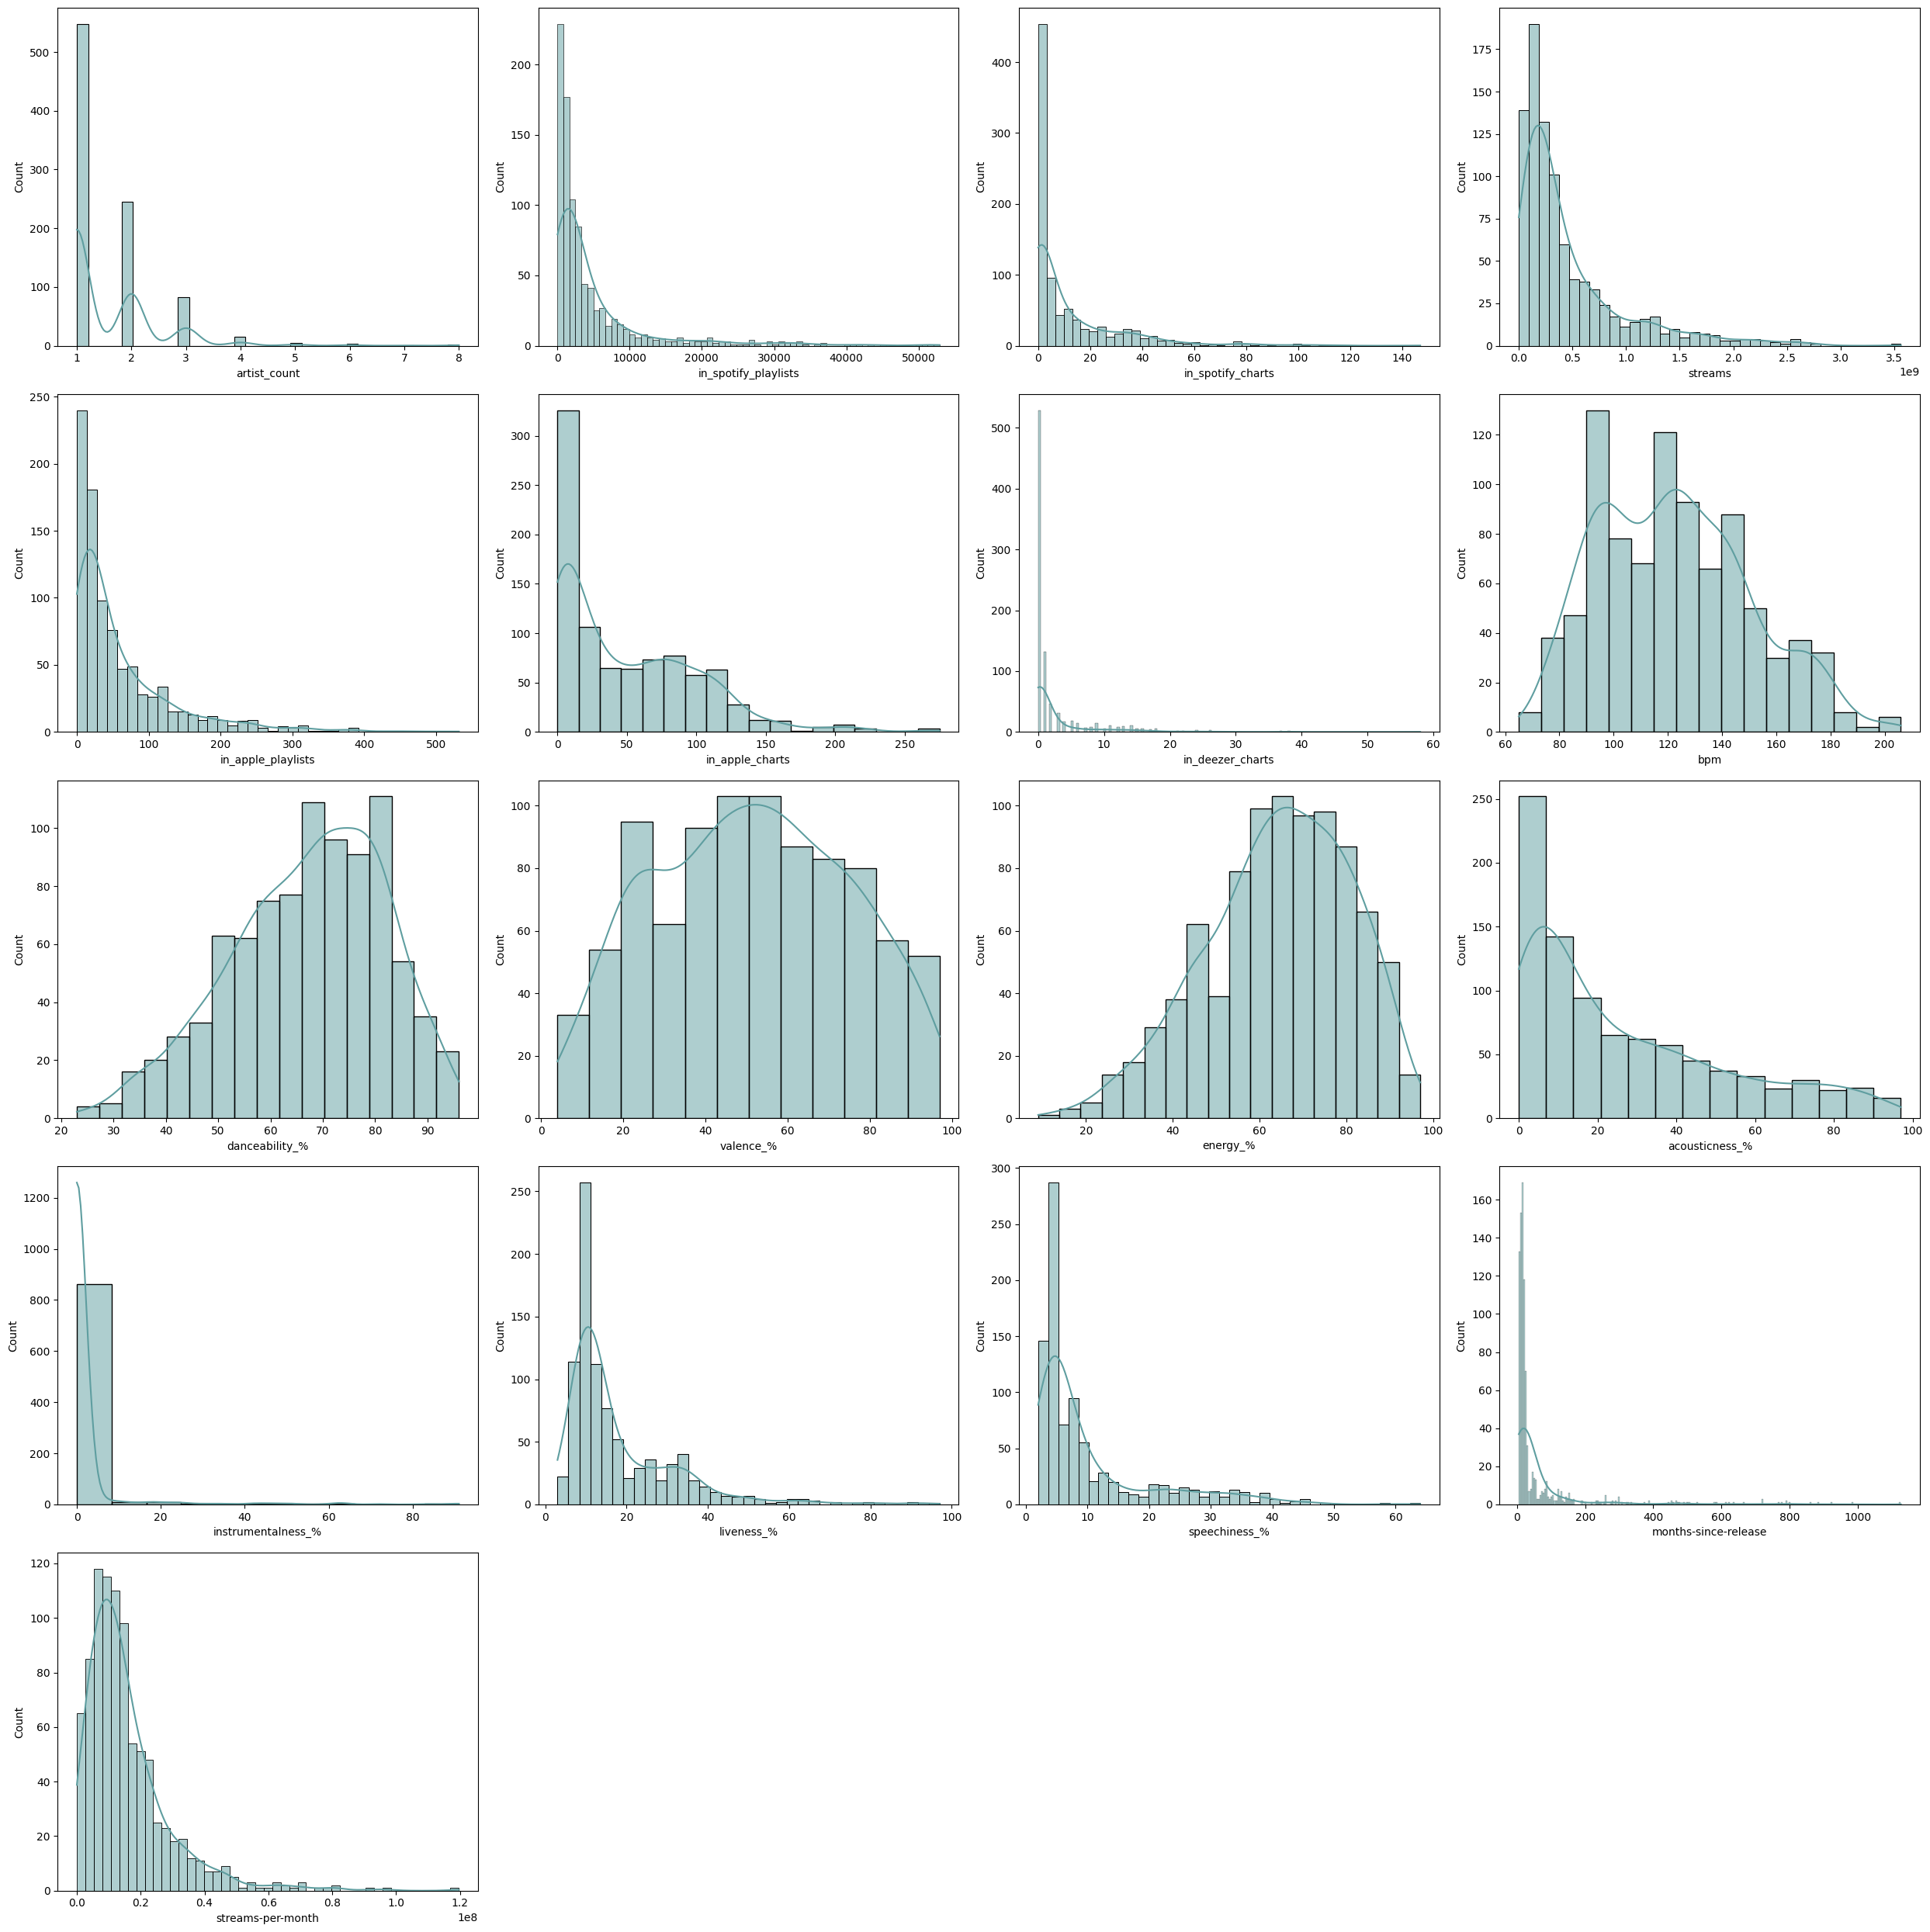

In [49]:
# Selecting numerical columns
df_num = df.select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows needed for subplots
num_cols = df_num.shape[1]
 # Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num, x=col, kde=True, color='#5F9EA0', ax=axes[i])

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

From all of these distributions for the top 1000 songs from Spotify, we can draw some general conclusions. For instance from their skewness in both danceability and energy, their left skewness means most songs are high energy and more danceable. Also, the months since release graph being very right skewed means that most songs were relativly new.

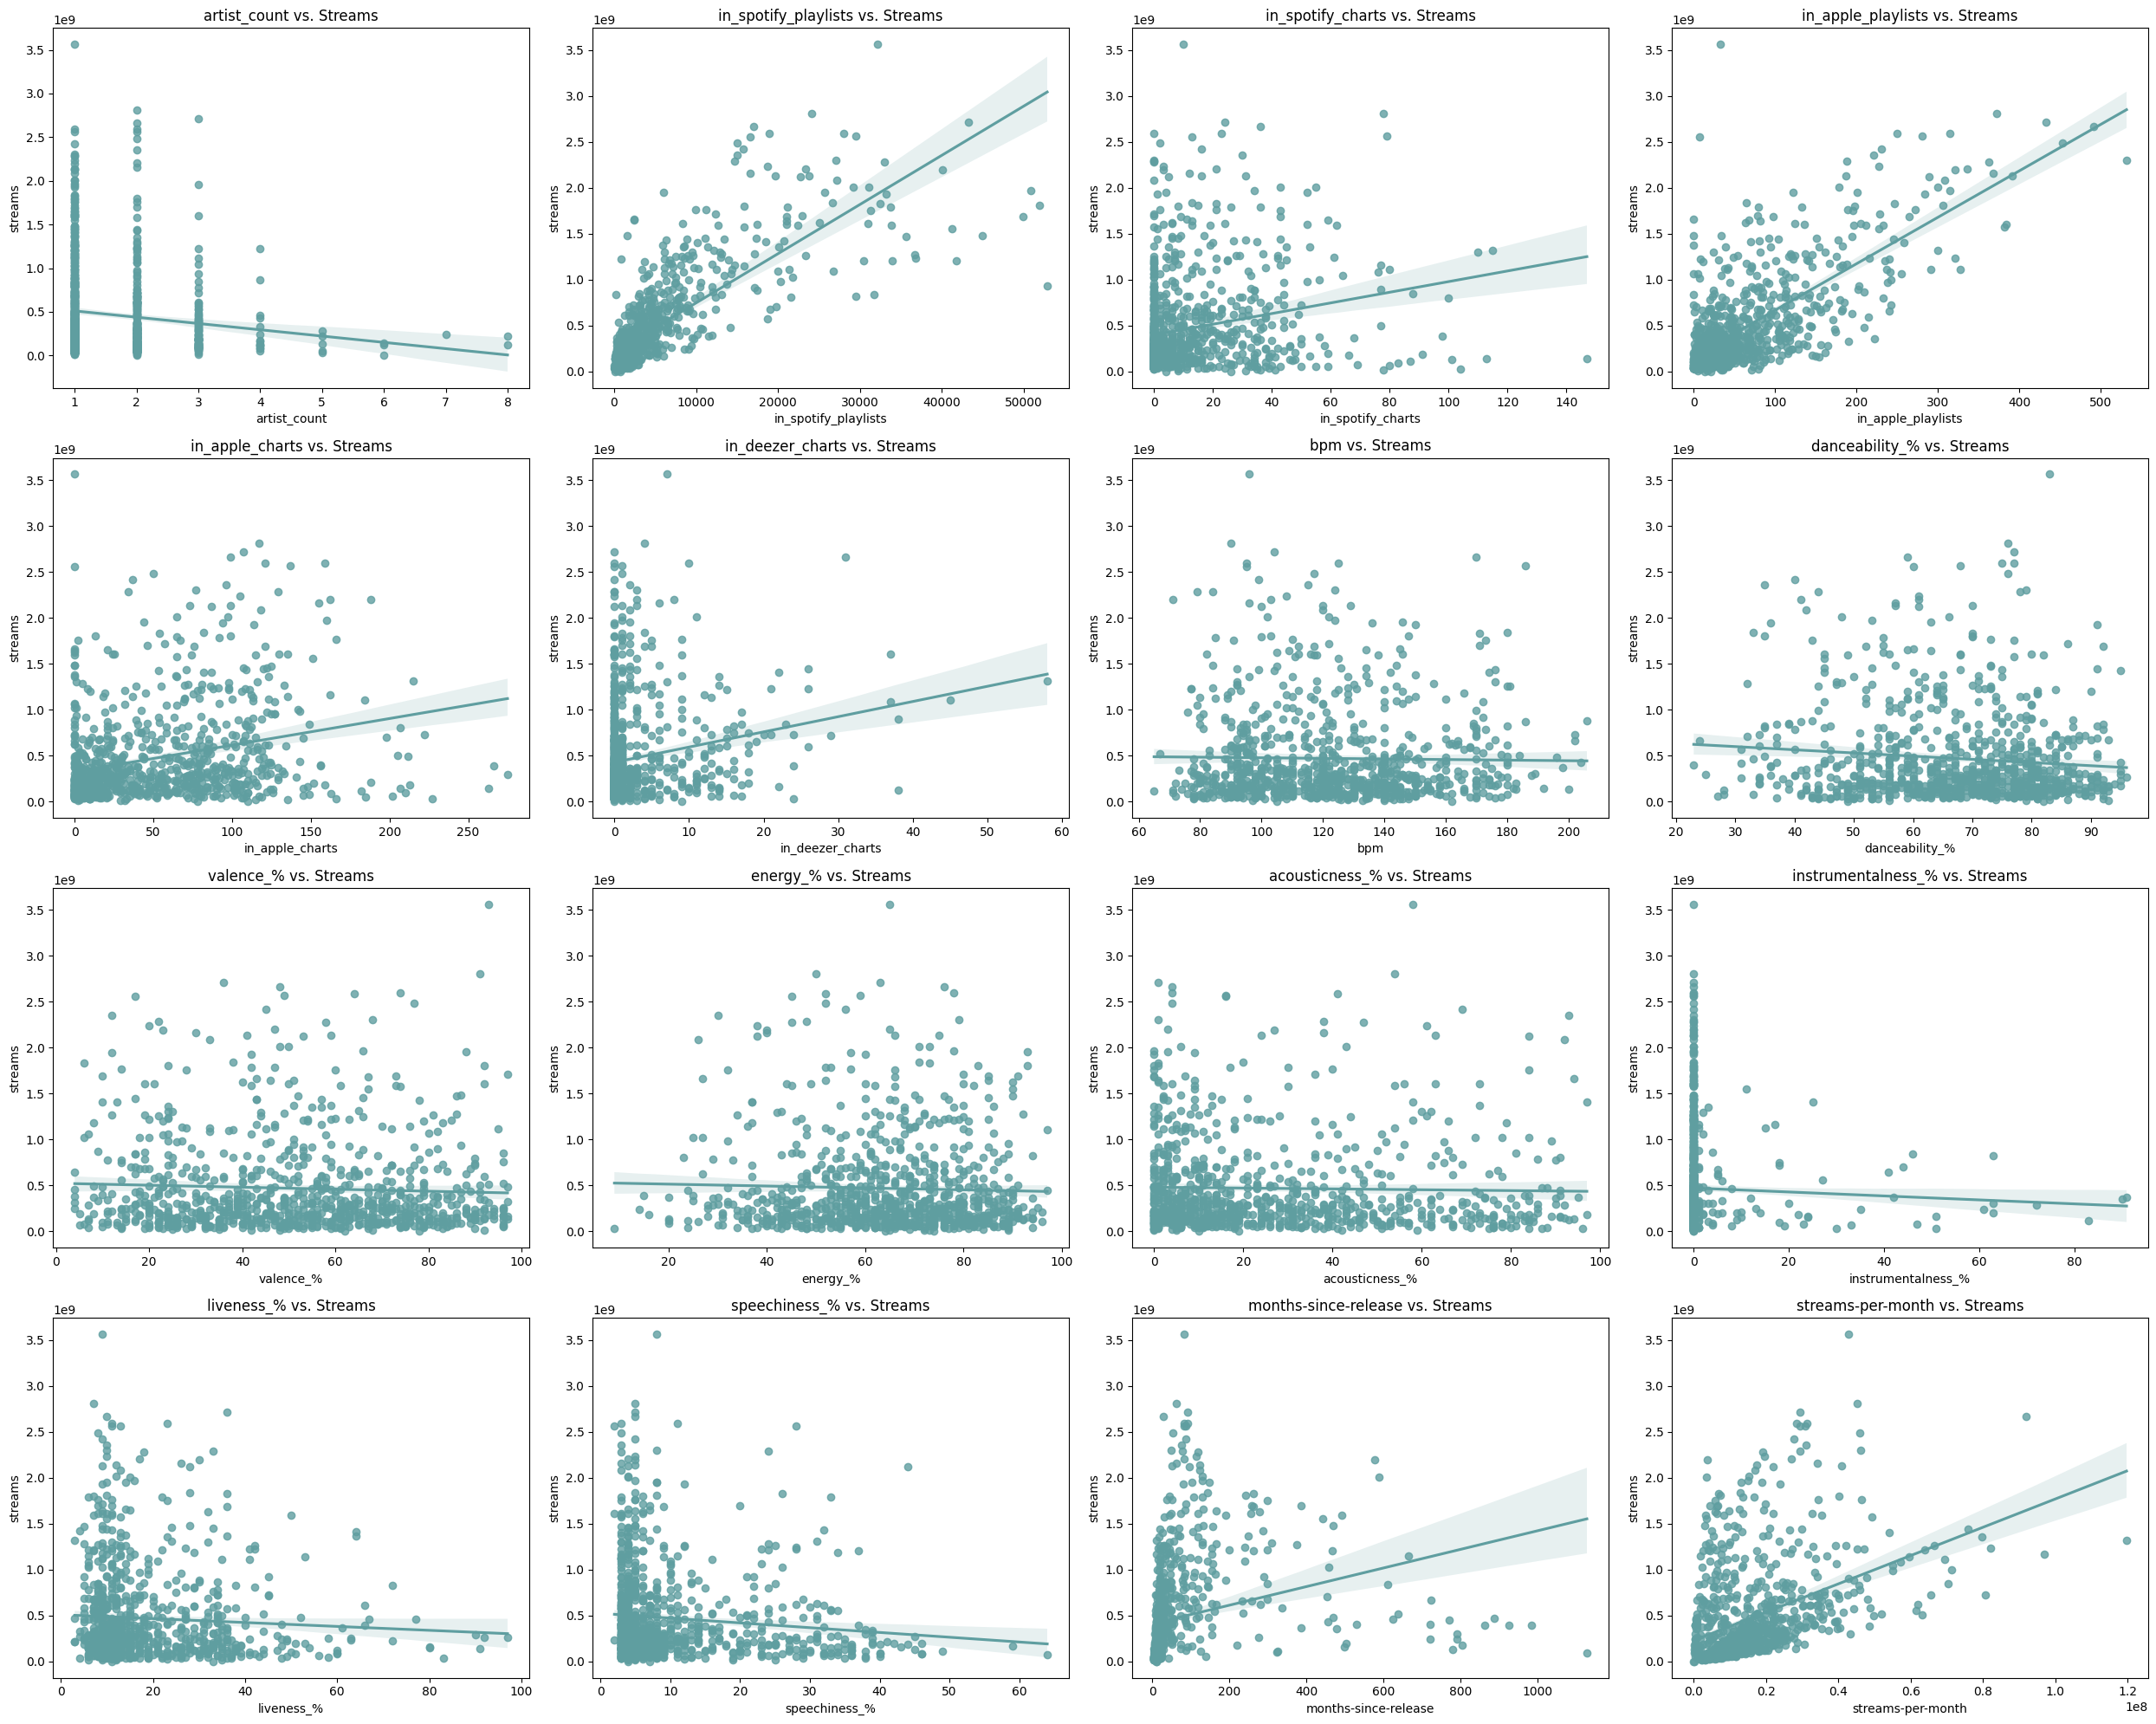

In [50]:
# Select numerical columns except 'streams'
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num = df_num.drop(columns=['streams'], errors='ignore')

# Calculate the number of rows needed for subplots
num_cols = df_num.shape[1]
# Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a regplot for each
for i, col in enumerate(df_num.columns):
    sns.regplot(data=df, x=col, y='streams', color='#5F9EA0', ax=axes[i])
    axes[i].set_title(f'{col} vs. Streams')

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Once again, while most of the attributions have close to 0 correlation. It is evident that songs in spotify, apple, and deezer playlists are higher performing in overall streams.

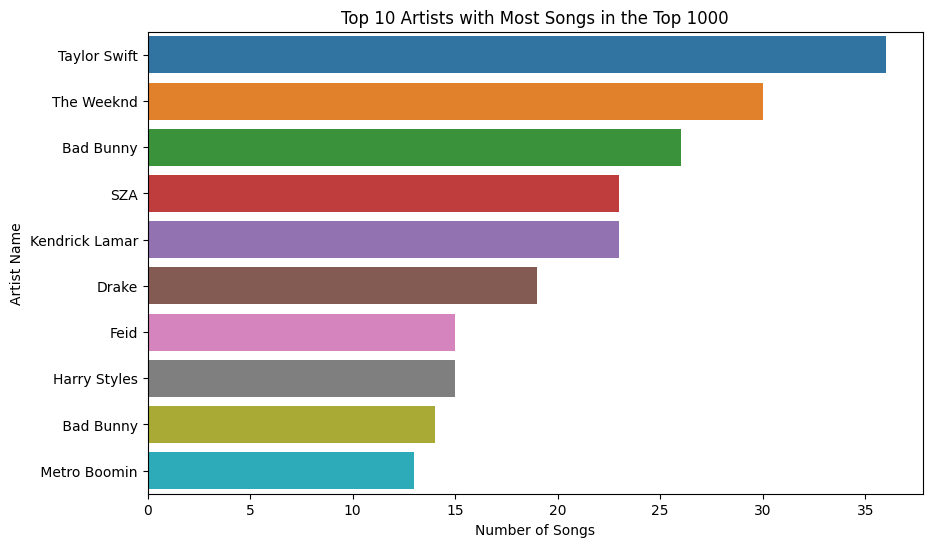

Taylor Swift      36
The Weeknd        30
Bad Bunny         26
SZA               23
Kendrick Lamar    23
Drake             19
Feid              15
Harry Styles      15
 Bad Bunny        14
 Metro Boomin     13
Name: artists, dtype: int64


In [51]:
# Split 'artist(s)_name' into separate artists and explode the DataFrame
# Explode() function is used to transform each element of a list-like to a row, replicating the index values.
df['artists'] = df['artist(s)_name'].str.split(',')
df_exploded = df.explode('artists')

# Count the number of songs for each artist
artist_song_count = df_exploded['artists'].value_counts()

# Get the top 10 artists with the most songs
top_artists_1000 = artist_song_count.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_1000.values, y=top_artists_1000.index)
plt.title("Top 10 Artists with Most Songs in the Top 1000")
plt.xlabel("Number of Songs")
plt.ylabel("Artist Name")
plt.show()

# Display the top artists and their counts
print(top_artists_1000)

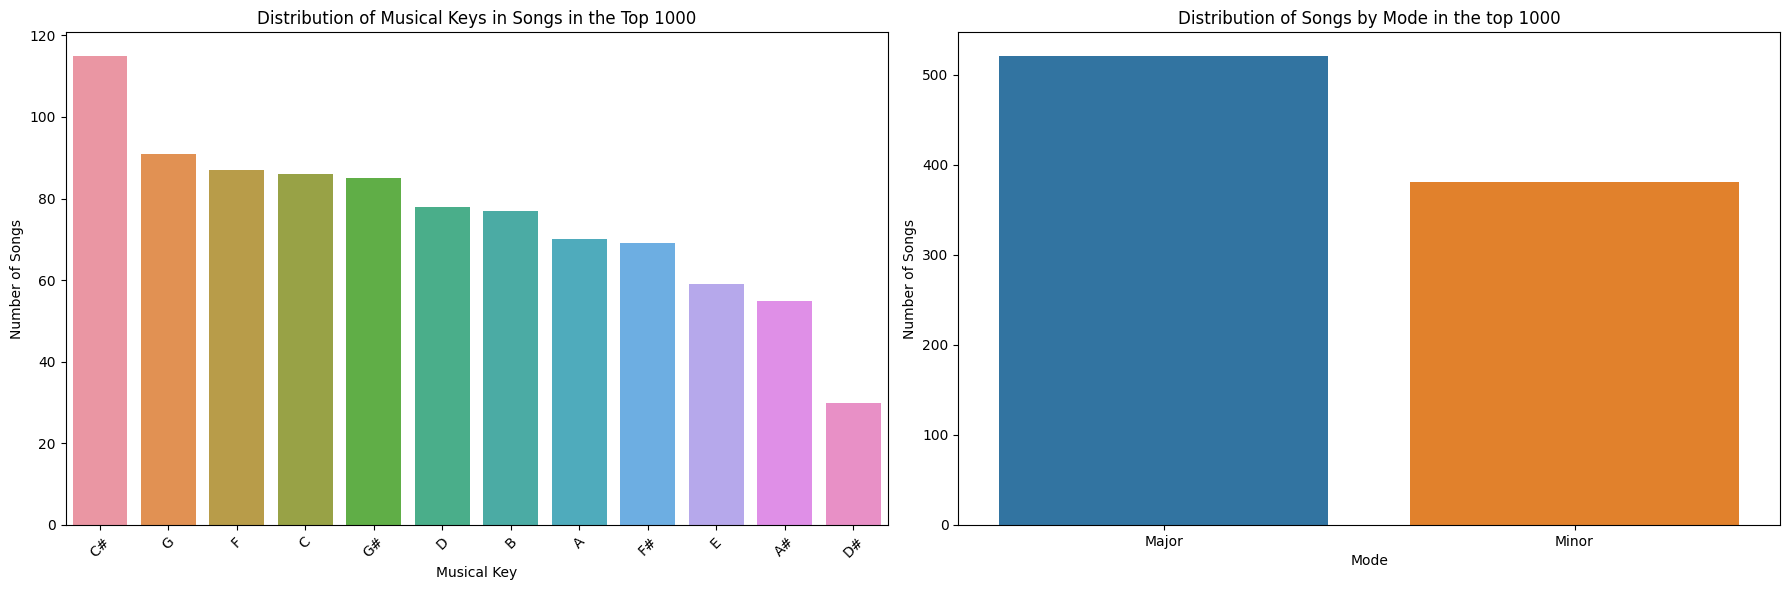

In [52]:
# Setting up a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting the key distribution
key_distribution_1000 = df['key'].value_counts()
sns.barplot(x=key_distribution_1000.index, y=key_distribution_1000.values, ax=axes[0])
axes[0].set_title('Distribution of Musical Keys in Songs in the Top 1000')
axes[0].set_xlabel('Musical Key')
axes[0].set_ylabel('Number of Songs')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the mode distribution
mode_distribution_1000 = df['mode'].value_counts()
sns.barplot(x=mode_distribution_1000.index, y=mode_distribution_1000.values, ax=axes[1])
axes[1].set_title('Distribution of Songs by Mode in the top 1000')
axes[1].set_xlabel('Mode')
axes[1].set_ylabel('Number of Songs')

# Display the plots
plt.tight_layout()
plt.show()

The majority of the songs in the top 1000 have a C# key and are in the Major mode

# Top 500 Songs by Streams


In [53]:
# Sorting the DataFrame by the 'streams' column in descending order
top_500_songs = df.sort_values(by='streams', ascending=False).head(500)

# Display the top 500 songs
top_500_songs.describe()


artist_count  in_spotify_playlists  in_spotify_charts       streams  \
count     500.00000             500.00000         500.000000  5.000000e+02   
mean        1.46400            7759.54800          14.104000  7.454836e+08   
std         0.75222            9182.84139          19.111874  5.599301e+08   
min         1.00000             168.00000           0.000000  2.368722e+08   
25%         1.00000            2382.25000           0.000000  3.385292e+08   
50%         1.00000            4272.00000           6.000000  5.352258e+08   
75%         2.00000            8914.50000          21.000000  9.722511e+08   
max         7.00000           52898.00000         115.000000  3.562544e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          500.000000       500.000000        500.000000  500.000000   
mean            90.422000        60.430000          3.308000  123.254000   
std             87.502006        49.329422          6.743893   28.976348   
min              0.000000         0.000000          0.000000   67.000000   
25%             26.750000        16.000000          0.000000   99.750000   
50%             65.000000        55.000000          0.000000  120.000000   
75%            122.250000        96.000000          3.000000  143.000000   
max            532.000000       275.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      500.000000  500.000000  500.000000       500.00000   
mean        66.272000   50.312000   63.862000        25.77600   
std         15.065855   23.394042   16.398683        25.56813   
min         23.000000    4.000000   14.000000         0.00000   
25%         56.000000   31.000000   53.000000         5.00000   
50%         68.000000   51.000000   65.000000        16.00000   
75%         78.000000   68.000000   76.000000        40.25000   
max         96.000000   97.000000   97.000000        97.00000   

       instrumentalness_%  liveness_%  speechiness_%  months-since-release  \
count          500.000000  500.000000      500.00000            500.000000   
mean             1.792000   17.798000        9.33000             87.022000   
std              9.388985   13.638373        8.70682            150.027925   
min              0.000000    3.000000        2.00000              7.000000   
25%              0.000000    9.000000        4.00000             19.000000   
50%              0.000000   12.000000        5.00000             27.000000   
75%              0.000000   22.250000       11.00000             83.000000   
max             91.000000   97.000000       45.00000            983.000000   

       streams-per-month  
count       5.000000e+02  
mean        2.060917e+07  
std         1.596688e+07  
min         3.101780e+05  
25%         1.014105e+07  
50%         1.711854e+07  
75%         2.692296e+07  
max         1.197142e+08

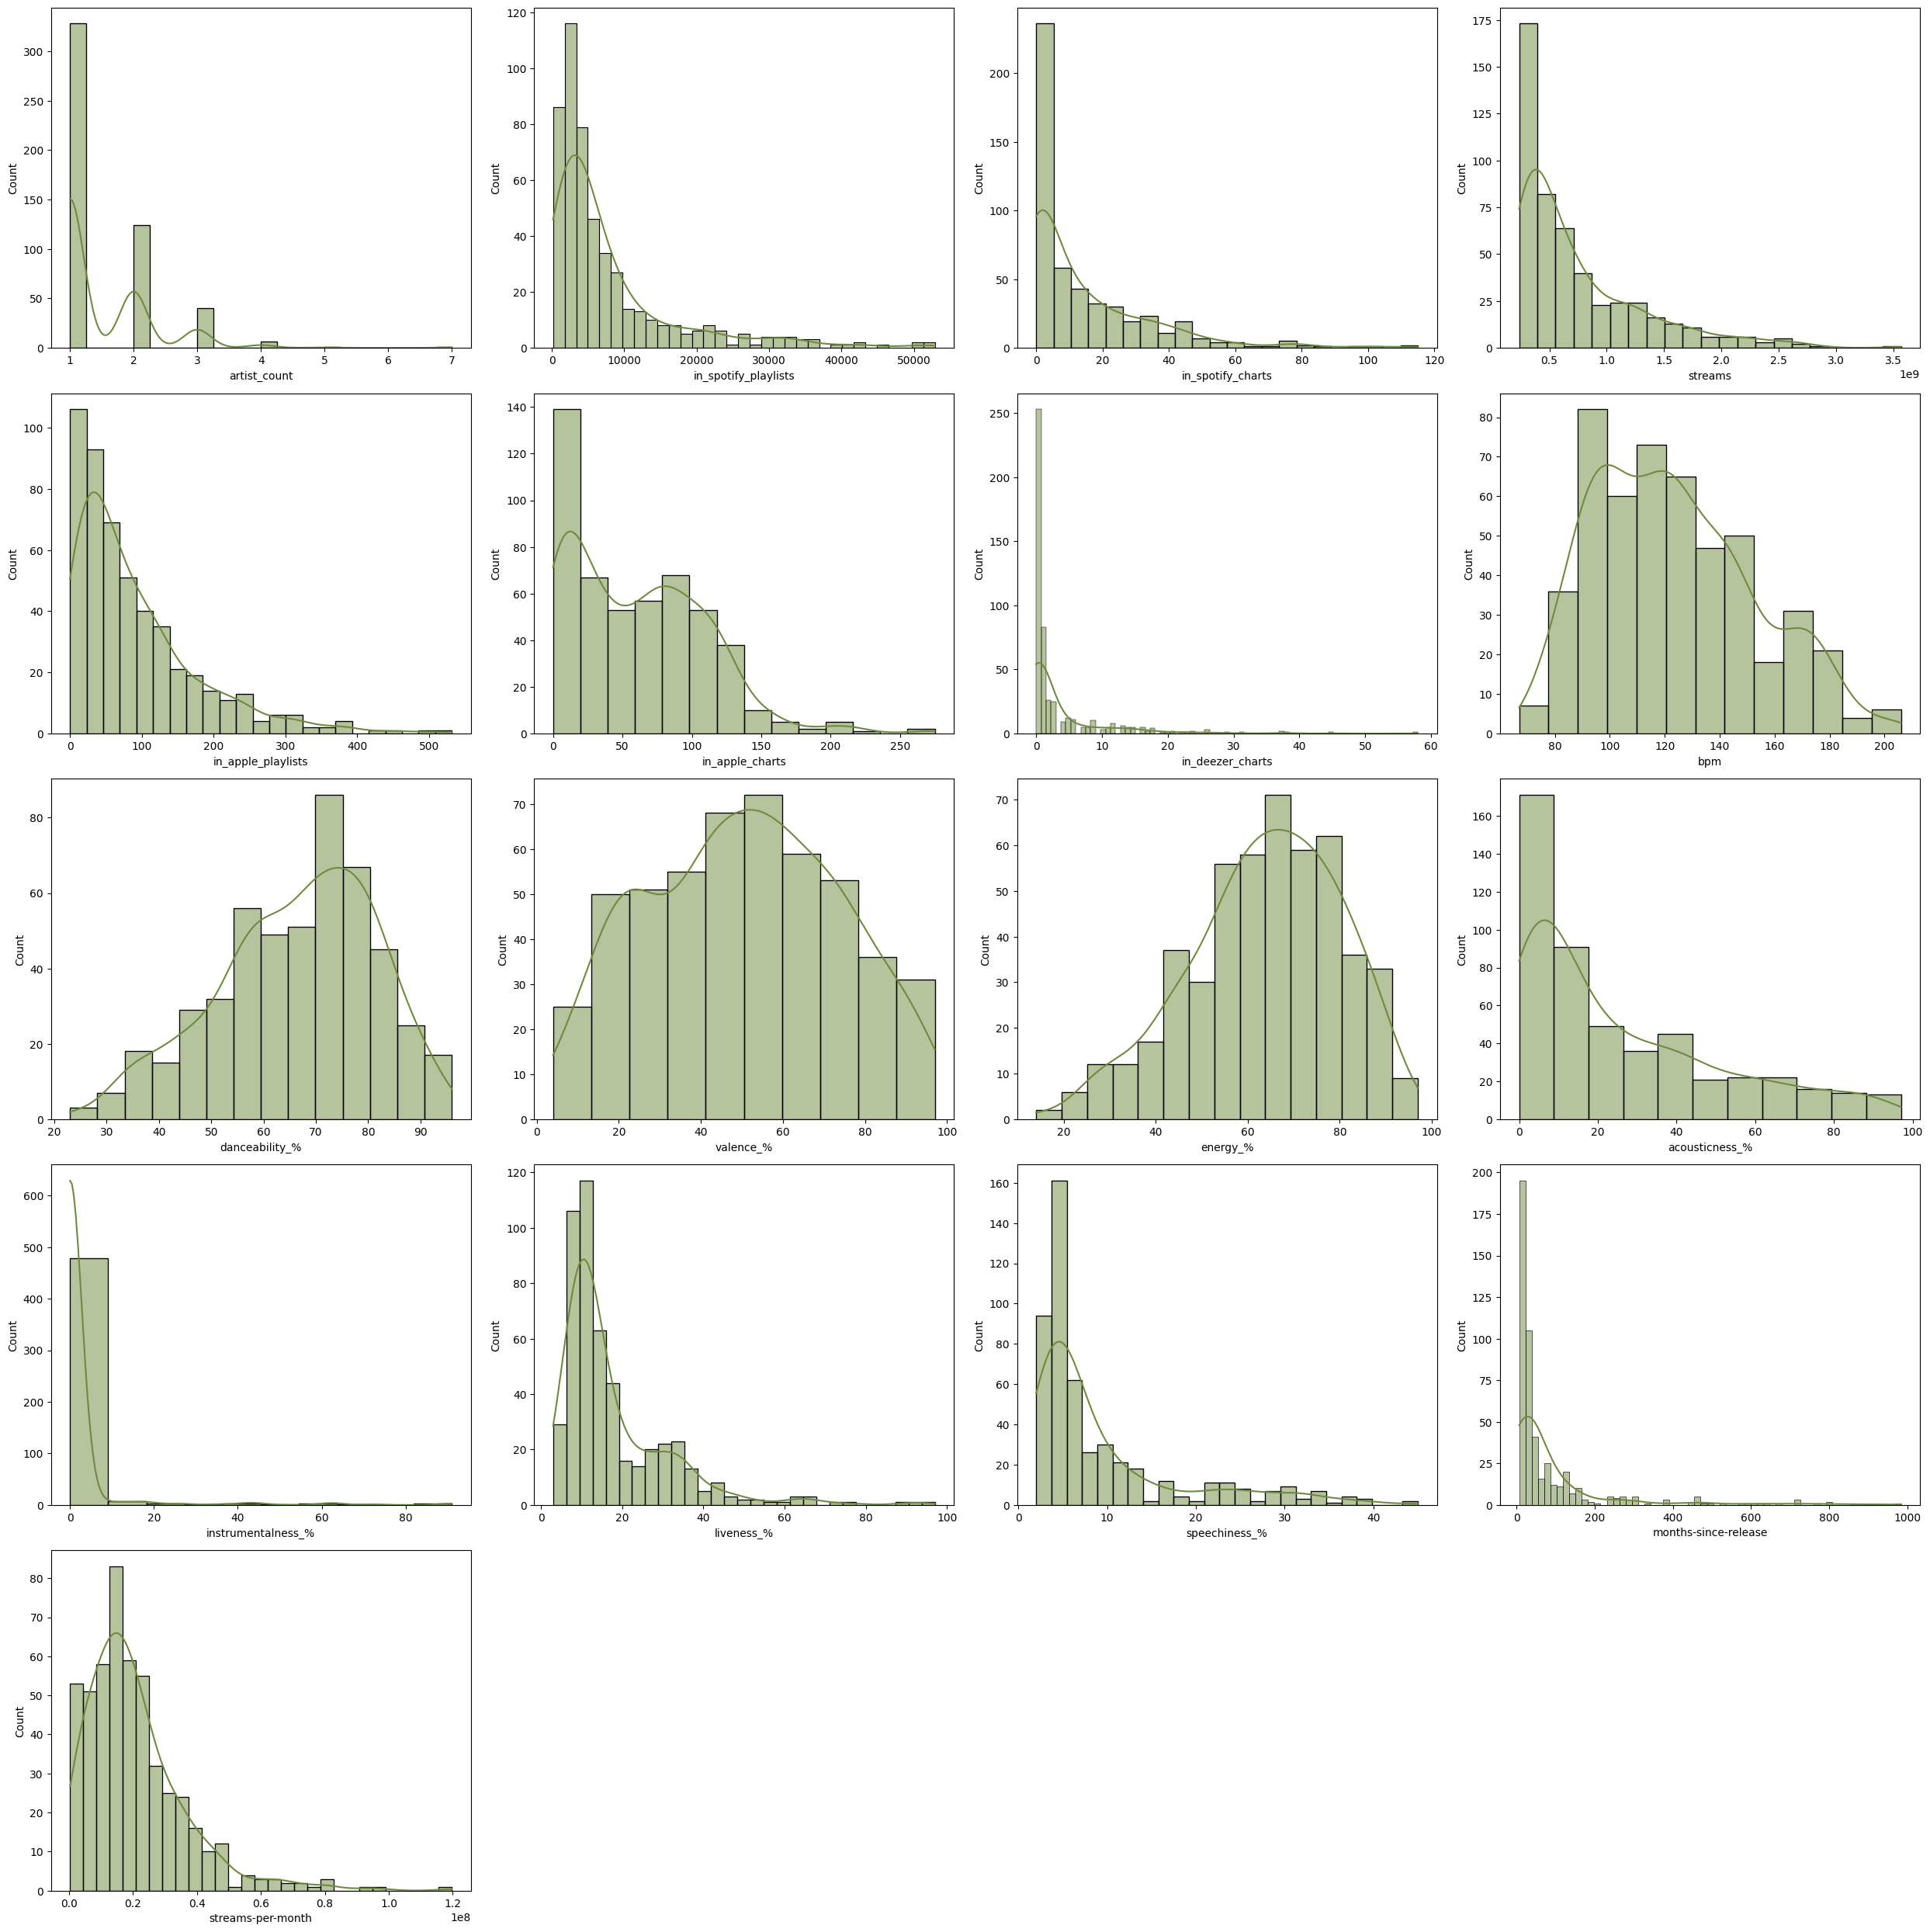

In [54]:
# Selecting numerical columns from the top 500 songs
df_num_top_500 = top_500_songs.select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows needed for subplots
num_cols = df_num_top_500.shape[1]
# Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(df_num_top_500.columns):
    sns.histplot(data=df_num_top_500, x=col, kde=True, color='#6E8B3D', ax=axes[i])

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

As the graphs results are relatively similar, we can draw the same conclusions from the Top 1000 graphs for the Top 500 graphs.

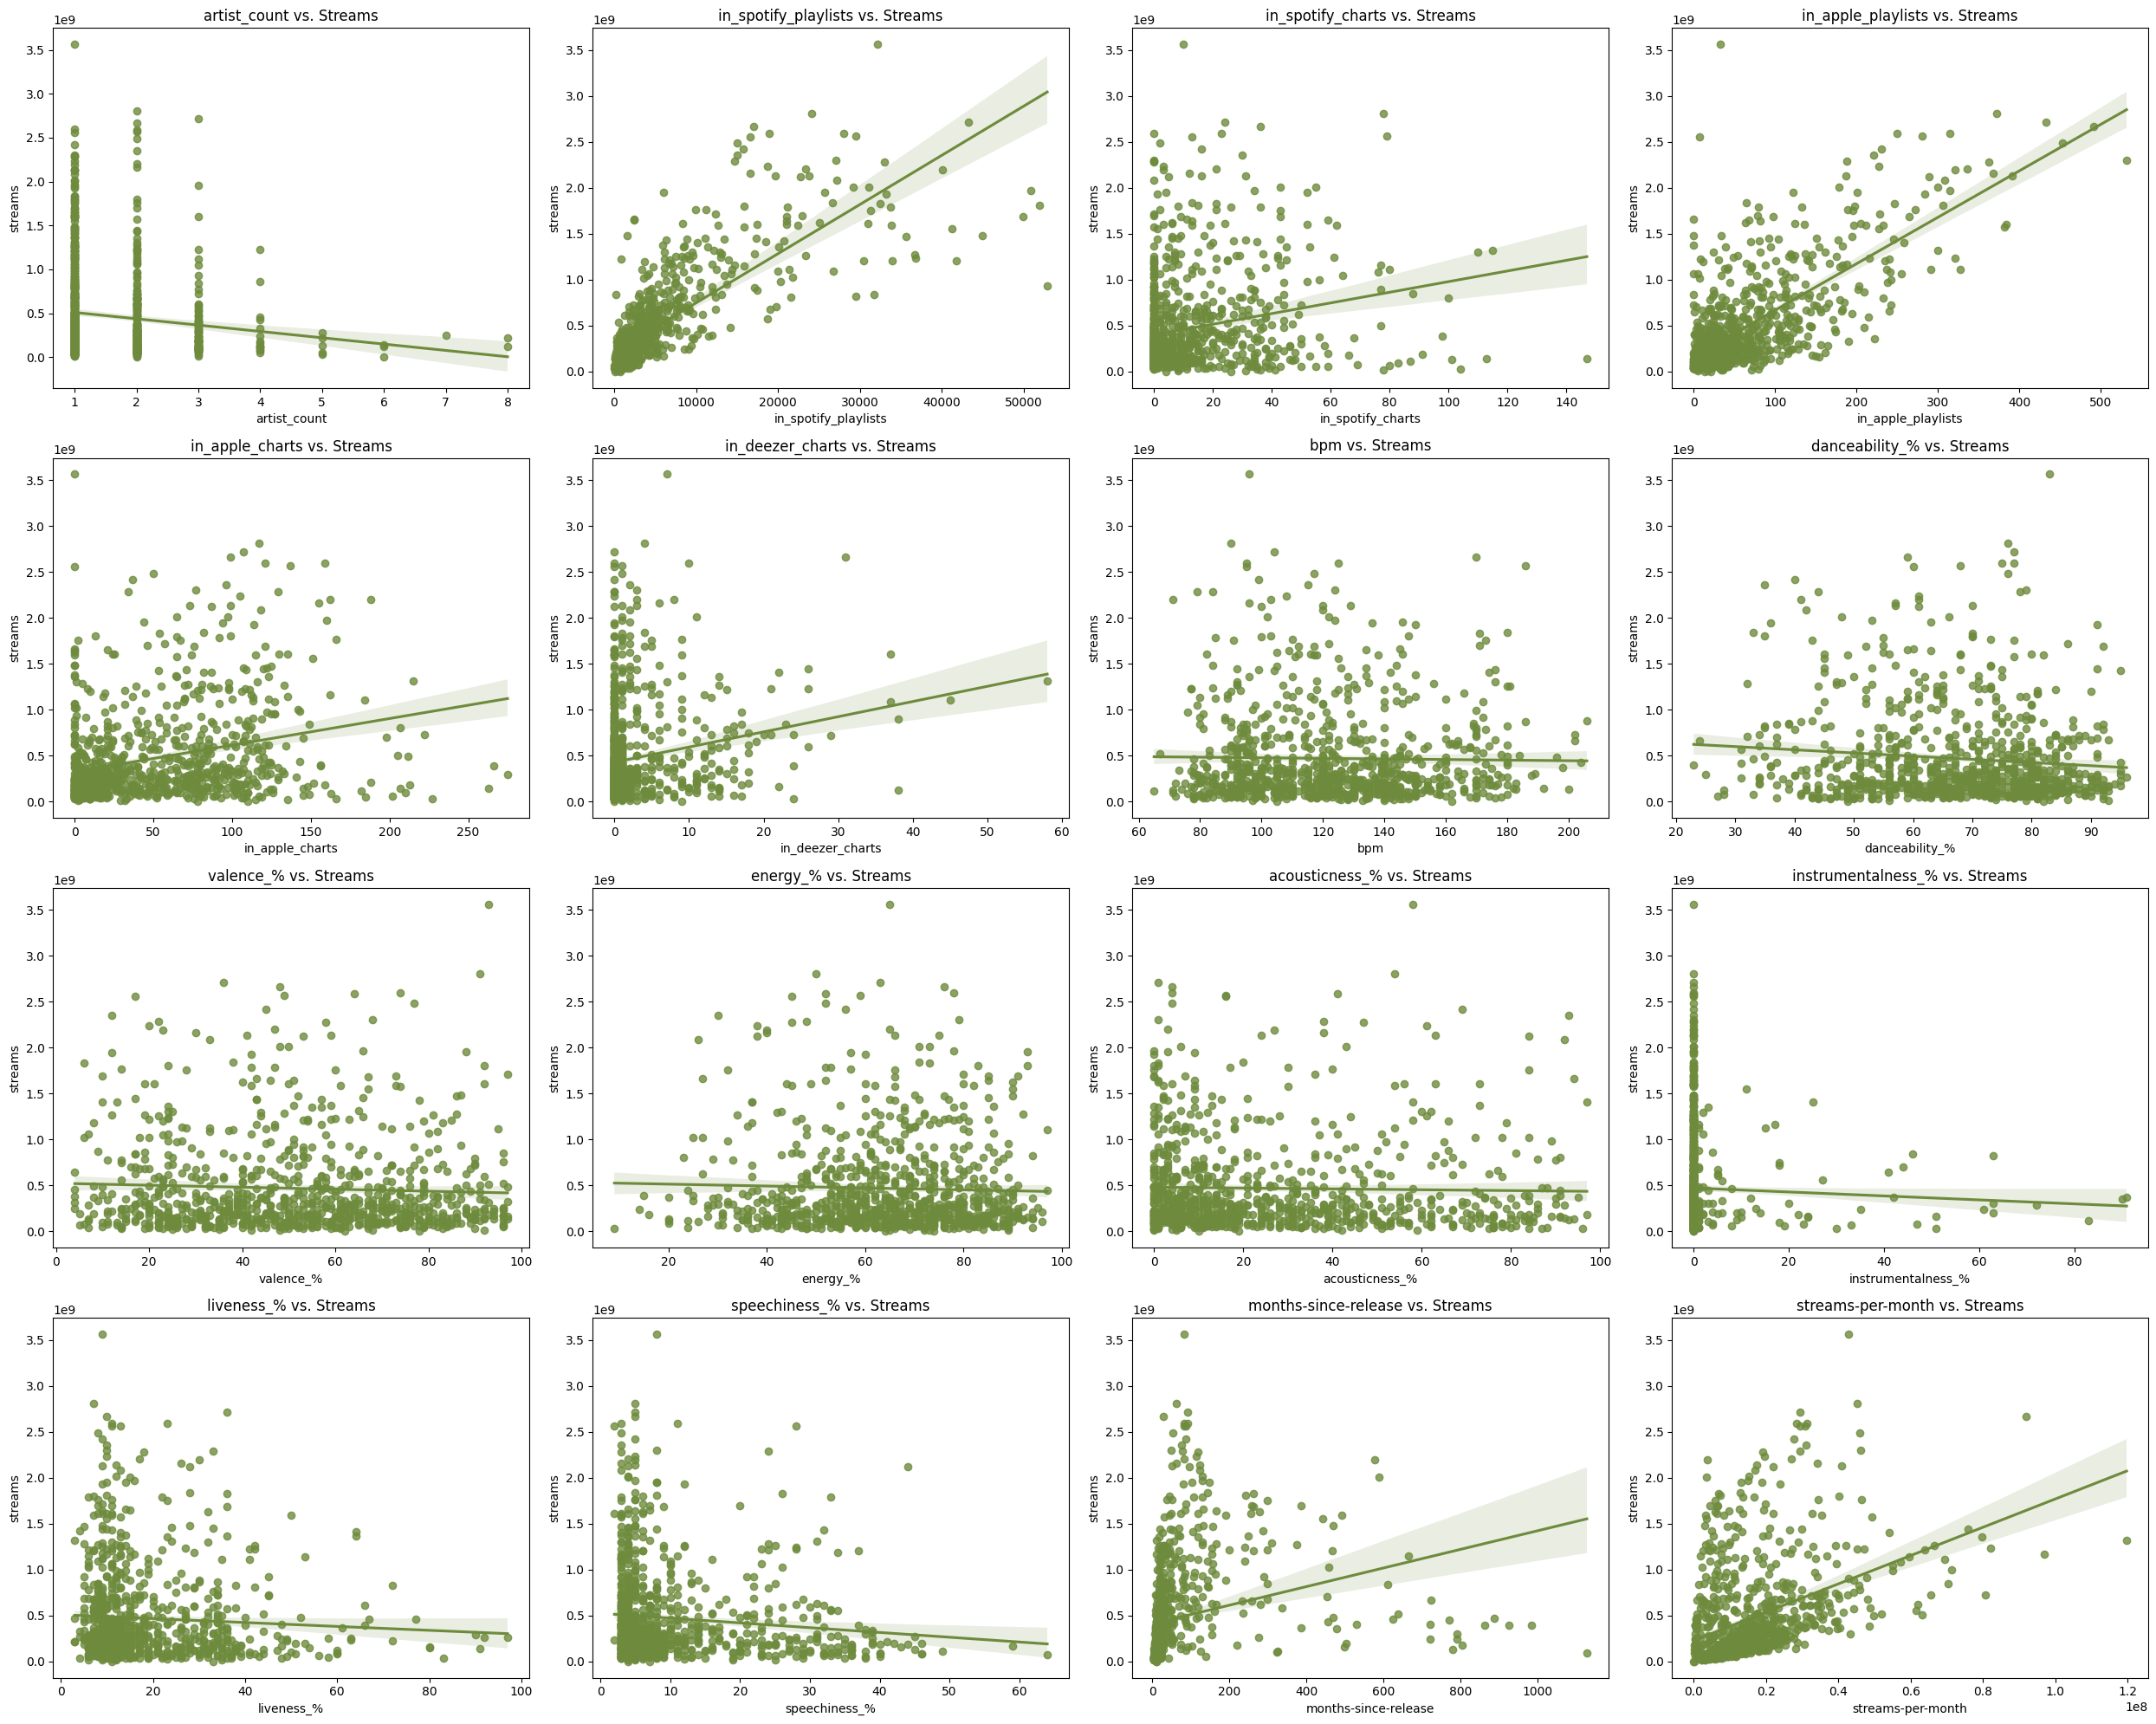

In [55]:
# Select numerical columns except 'streams'
df_num_top_500 = df.select_dtypes(include=['float64', 'int64'])
df_num_top_500 = df_num_top_500.drop(columns=['streams'], errors='ignore')

# Calculate the number of rows needed for subplots
num_cols = df_num_top_500.shape[1]
# Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a regplot for each
for i, col in enumerate(df_num_top_500.columns):
    sns.regplot(data=df, x=col, y='streams', color='#6E8B3D', ax=axes[i])
    axes[i].set_title(f'{col} vs. Streams')

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Once again, songs that are more present in Spotify, Apple, or Deezer playlists will have the most amount of streams as well.

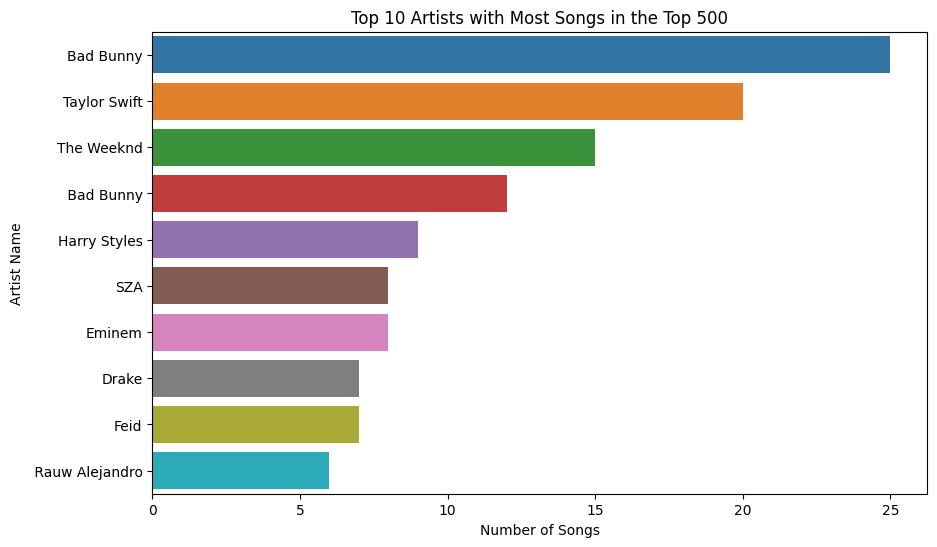

Bad Bunny          25
Taylor Swift       20
The Weeknd         15
 Bad Bunny         12
Harry Styles        9
SZA                 8
Eminem              8
Drake               7
Feid                7
 Rauw Alejandro     6
Name: artists, dtype: int64


In [56]:
# Split 'artist(s)_name' into separate artists and explode the DataFrame
top_500_songs['artists'] = top_500_songs['artist(s)_name'].str.split(',')
top_500_exploded = top_500_songs.explode('artists')

# Count the number of songs for each artist in the top 500
artist_song_count_top_500 = top_500_exploded['artists'].value_counts()

# Get the top 10 artists with the most songs in the top 500
top_artists_500 = artist_song_count_top_500.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_500.values, y=top_artists_500.index)
plt.title("Top 10 Artists with Most Songs in the Top 500")
plt.xlabel("Number of Songs")
plt.ylabel("Artist Name")
plt.show()

# Display the top artists and their counts
print(top_artists_500)

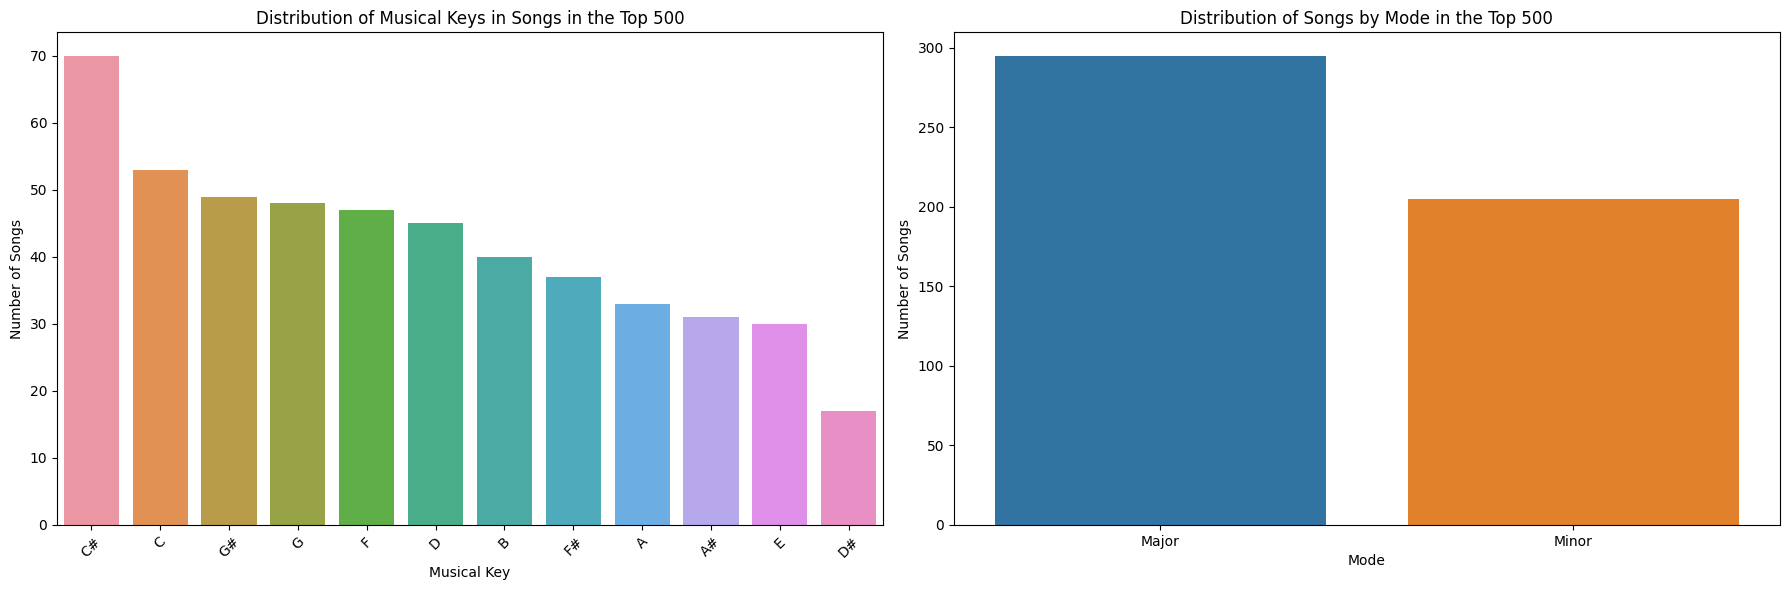

In [57]:
# Setting up a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting the key distribution for the top 500 songs
key_distribution_500 = top_500_songs['key'].value_counts()
sns.barplot(x=key_distribution_500.index, y=key_distribution_500.values, ax=axes[0])
axes[0].set_title('Distribution of Musical Keys in Songs in the Top 500')
axes[0].set_xlabel('Musical Key')
axes[0].set_ylabel('Number of Songs')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the mode distribution for the top 500 songs
mode_distribution_500 = top_500_songs['mode'].value_counts()
sns.barplot(x=mode_distribution_500.index, y=mode_distribution_500.values, ax=axes[1])
axes[1].set_title('Distribution of Songs by Mode in the Top 500')
axes[1].set_xlabel('Mode')
axes[1].set_ylabel('Number of Songs')

# Display the plots
plt.tight_layout()
plt.show()


Simliar to the top 1000 songs, most of the songs in the Top 500 are in the C# key and are also in the major mode

# Top 100 Songs by Streams


In [58]:
# Sorting the DataFrame by the 'streams' column in descending order for the top 100 songs
top_100_songs = df.sort_values(by='streams', ascending=False).head(100)

# Display the top 100 songs
top_100_songs.describe()

artist_count  in_spotify_playlists  in_spotify_charts       streams  \
count    100.000000            100.000000         100.000000  1.000000e+02   
mean       1.330000          19734.170000          22.050000  1.688221e+09   
std        0.603943          11952.565243          23.674721  4.776620e+08   
min        1.000000            824.000000           0.000000  1.145728e+09   
25%        1.000000           9891.500000           4.750000  1.283566e+09   
50%        1.000000          17094.000000          14.500000  1.593090e+09   
75%        2.000000          27423.750000          34.250000  1.957819e+09   
max        4.000000          51979.000000         115.000000  3.562544e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          100.000000       100.000000        100.000000  100.000000   
mean           184.820000        78.610000          4.650000  121.000000   
std            118.005511        49.552318          8.769063   27.904961   
min              0.000000         0.000000          0.000000   71.000000   
25%             91.000000        42.750000          0.000000   99.750000   
50%            181.000000        81.500000          1.000000  117.500000   
75%            252.000000       112.500000          5.000000  136.500000   
max            532.000000       215.000000         58.000000  186.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      100.000000  100.000000  100.000000      100.000000   
mean        63.560000   48.900000   64.410000       25.840000   
std         14.518063   23.801154   16.774256       27.882408   
min         32.000000    6.000000   26.000000        0.000000   
25%         53.000000   24.750000   52.000000        3.000000   
50%         64.000000   49.000000   66.000000       13.500000   
75%         73.250000   66.000000   77.250000       43.250000   
max         95.000000   97.000000   93.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  months-since-release  \
count          100.000000  100.000000     100.000000            100.000000   
mean             0.590000   16.870000       8.860000            143.030000   
std              3.200679   12.138639       9.304088            137.605236   
min              0.000000    3.000000       2.000000             11.000000   
25%              0.000000    9.000000       4.000000             49.750000   
50%              0.000000   12.000000       5.000000             91.500000   
75%              0.000000   23.000000       8.000000            167.000000   
max             25.000000   64.000000      44.000000            665.000000   

       streams-per-month  
count       1.000000e+02  
mean        2.532638e+07  
std         2.257350e+07  
min         1.722898e+06  
25%         7.891154e+06  
50%         1.950401e+07  
75%         3.285349e+07  
max         1.197142e+08

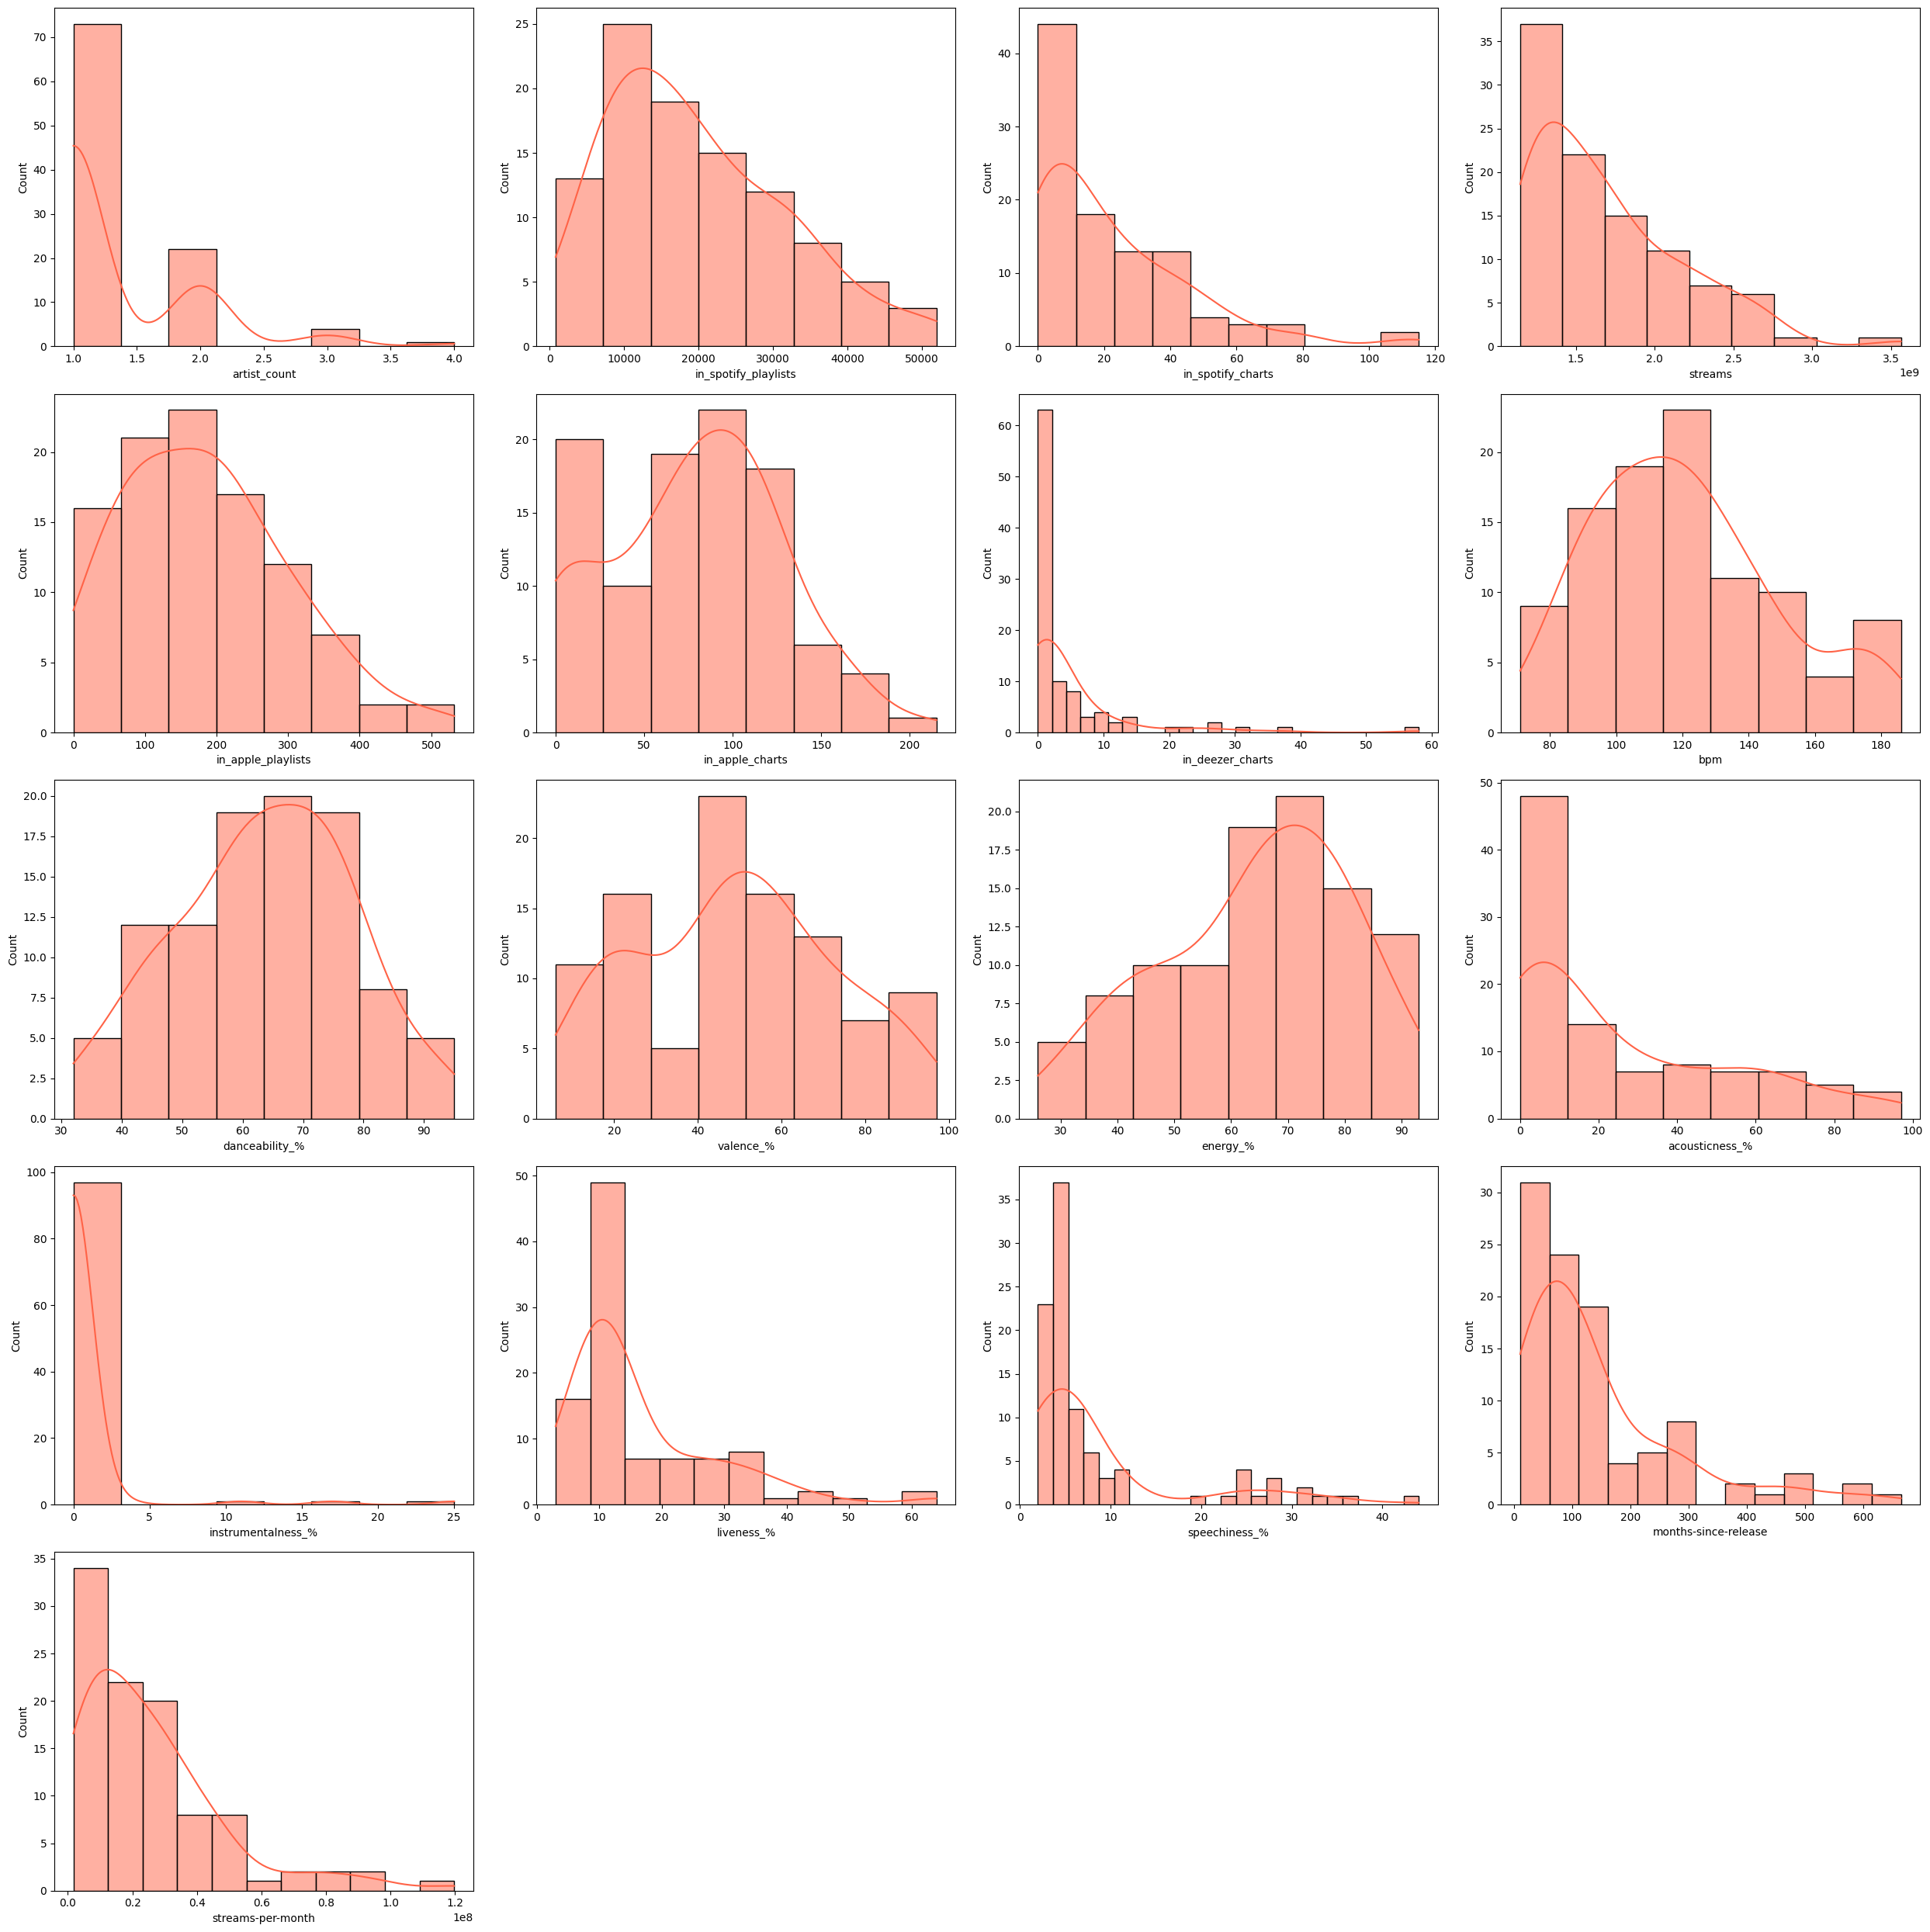

In [59]:
# Selecting numerical columns from the top 500 songs
df_num_top_100 = top_100_songs.select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows needed for subplots
num_cols = df_num_top_100.shape[1]
# Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(df_num_top_100.columns):
    sns.histplot(data=df_num_top_100, x=col, kde=True, color='#FF6347', ax=axes[i])

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

As both the Top 1000 songs graphs and Top 500 songs graphs, the results are the same

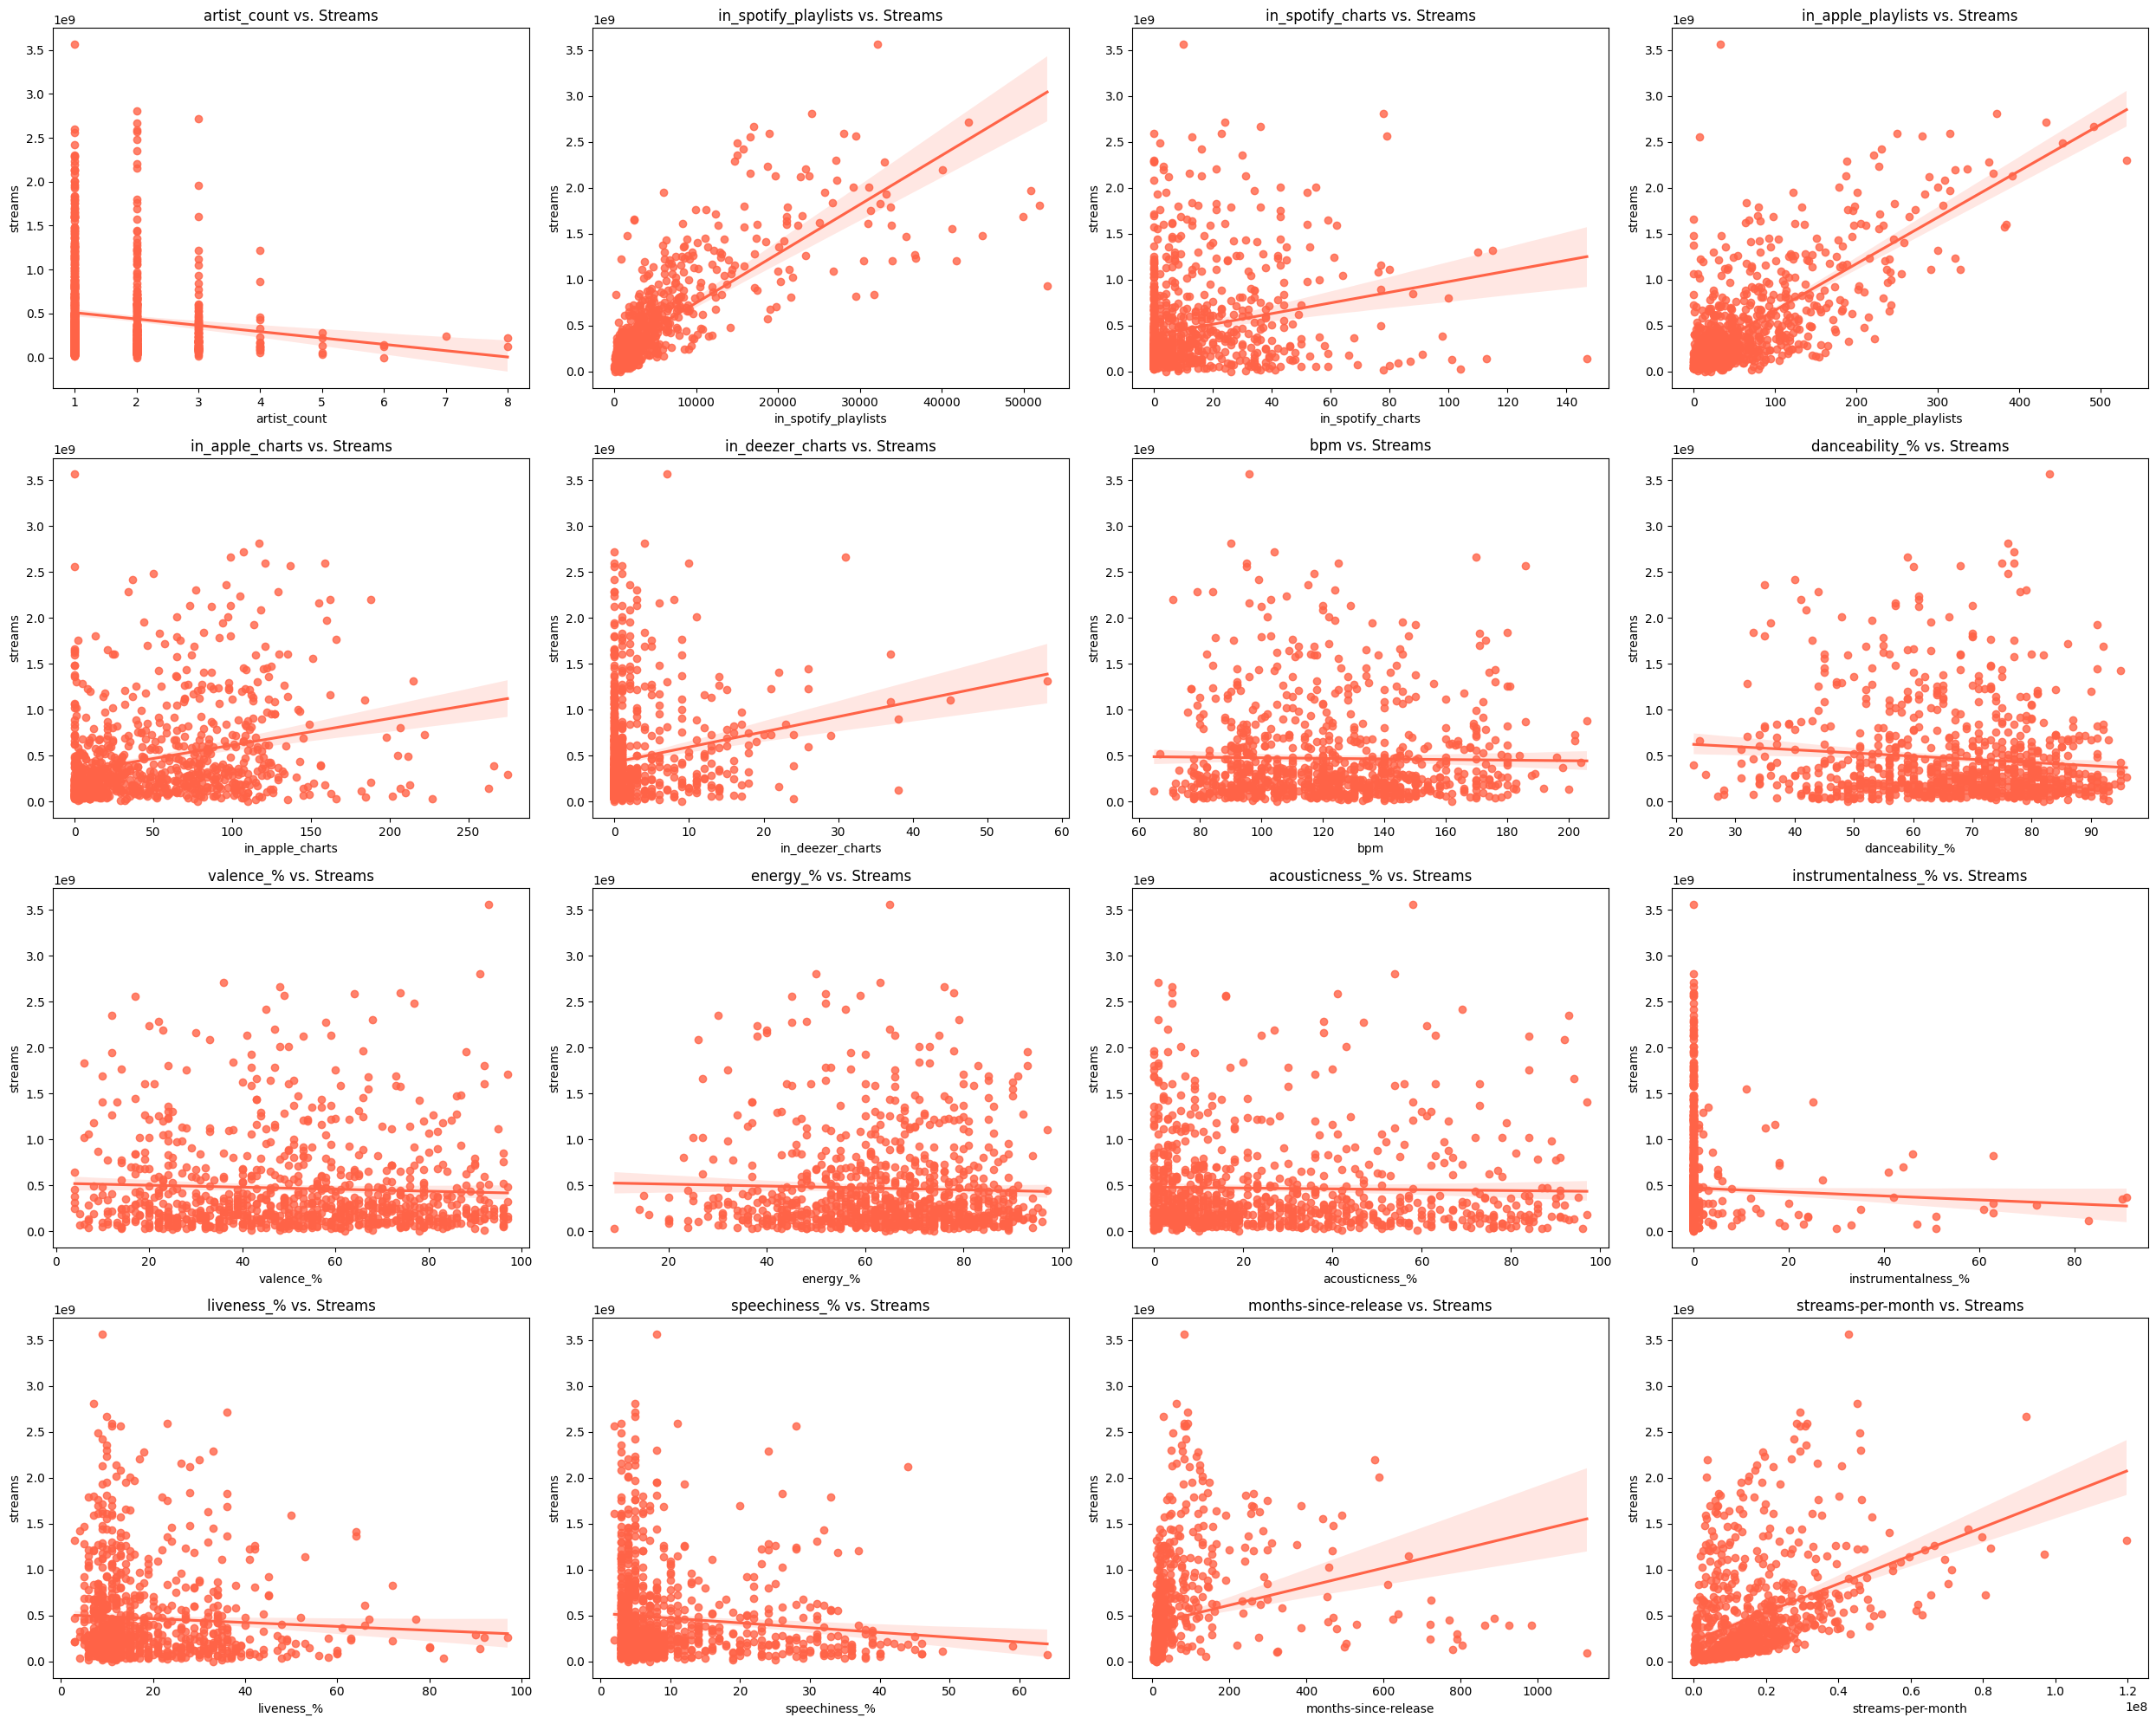

In [60]:
# Select numerical columns except 'streams'
df_num_top_100 = df.select_dtypes(include=['float64', 'int64'])
df_num_top_100 = df_num_top_100.drop(columns=['streams'], errors='ignore')

# Calculate the number of rows needed for subplots
num_cols = df_num_top_100.shape[1]
# Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a regplot for each
for i, col in enumerate(df_num_top_100.columns):
    sns.regplot(data=df, x=col, y='streams', color='#FF6347', ax=axes[i])
    axes[i].set_title(f'{col} vs. Streams')

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

As before, songs in Spotify, Apple, and Deezer playlists result in songs with the most sreams

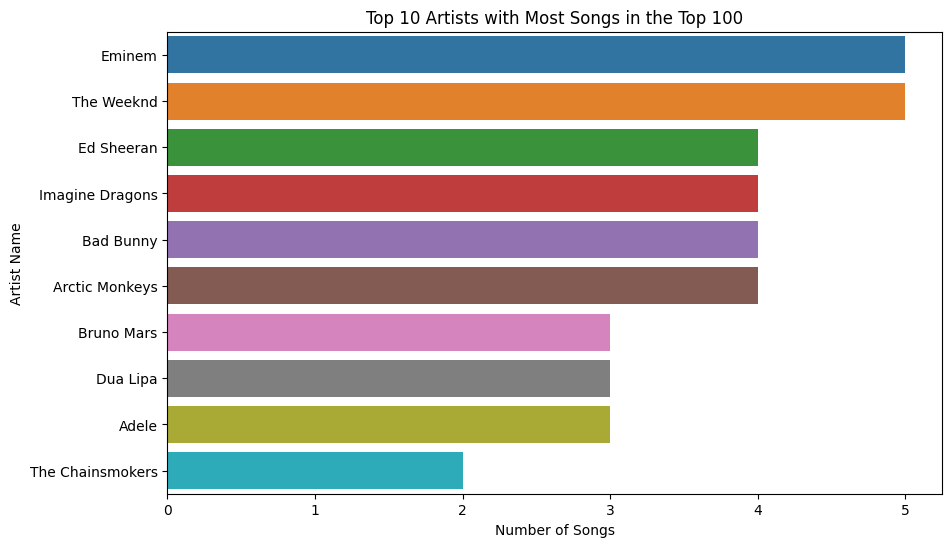

Eminem              5
The Weeknd          5
Ed Sheeran          4
Imagine Dragons     4
Bad Bunny           4
Arctic Monkeys      4
Bruno Mars          3
Dua Lipa            3
Adele               3
The Chainsmokers    2
Name: artists, dtype: int64


In [61]:
# Split 'artist(s)_name' into separate artists and explode the DataFrame
top_100_songs['artists'] = top_100_songs['artist(s)_name'].str.split(',')
top_100_exploded = top_100_songs.explode('artists')

# Count the number of songs for each artist in the top 100
artist_song_count_top_100 = top_100_exploded['artists'].value_counts()

# Get the top 10 artists with the most songs in the top 100
top_artists_100 = artist_song_count_top_100.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_100.values, y=top_artists_100.index)
plt.title("Top 10 Artists with Most Songs in the Top 100")
plt.xlabel("Number of Songs")
plt.ylabel("Artist Name")
plt.show()

# Display the top artists and their counts
print(top_artists_100)

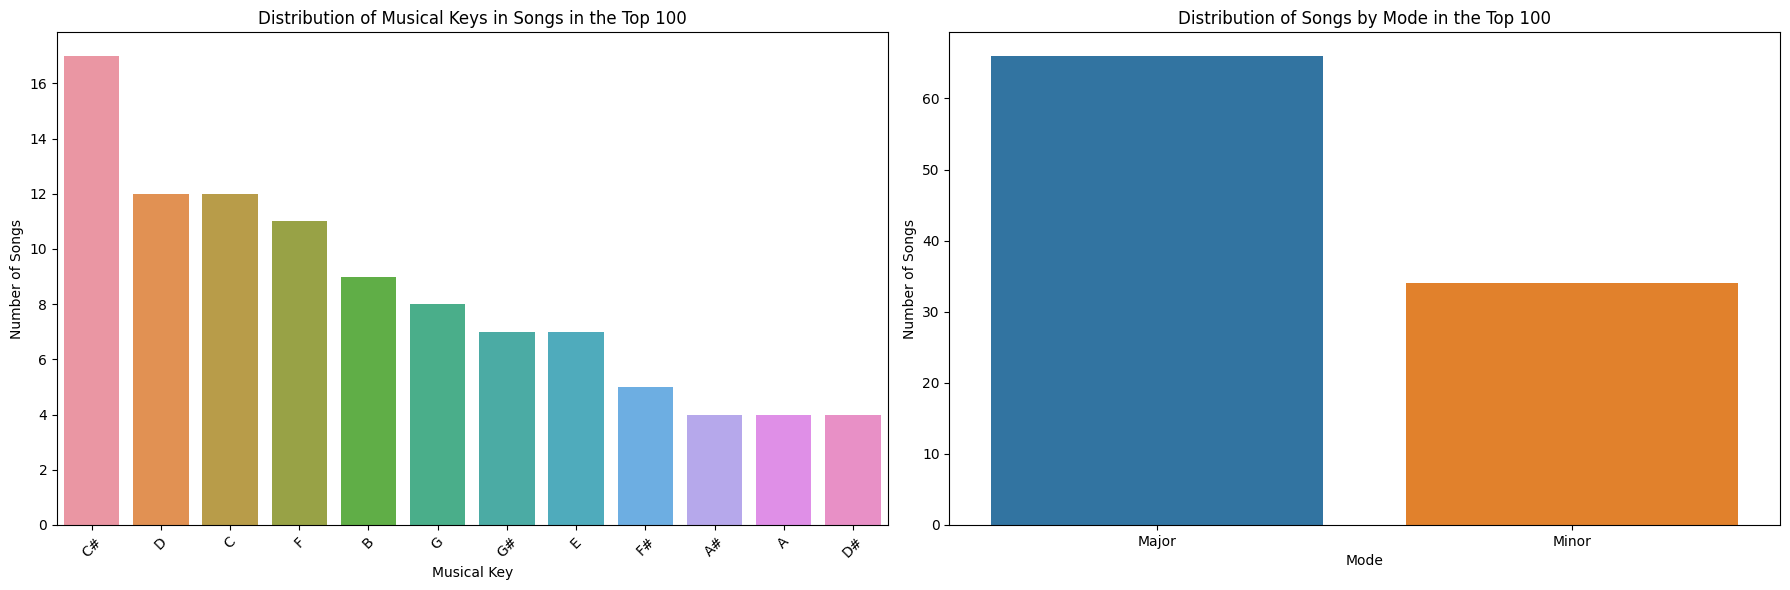

In [62]:
# Setting up a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting the key distribution for the top 100 songs
key_distribution_100 = top_100_songs['key'].value_counts()
sns.barplot(x=key_distribution_100.index, y=key_distribution_100.values, ax=axes[0])
axes[0].set_title('Distribution of Musical Keys in Songs in the Top 100')
axes[0].set_xlabel('Musical Key')
axes[0].set_ylabel('Number of Songs')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the mode distribution for the top 100 songs
mode_distribution_100 = top_100_songs['mode'].value_counts()
sns.barplot(x=mode_distribution_100.index, y=mode_distribution_100.values, ax=axes[1])
axes[1].set_title('Distribution of Songs by Mode in the Top 100')
axes[1].set_xlabel('Mode')
axes[1].set_ylabel('Number of Songs')

# Display the plots
plt.tight_layout()
plt.show()


For the top 100 songs, it is still evident C# is still at the top for songs in the most musical key. Also, the top 100 songs still have over 60% of songs in the major mode.

# Top 10 Songs by Streams

In [63]:
# Sorting the DataFrame by the 'streams' column in descending order for the top 10 songs
top_10_songs = df.sort_values(by='streams', ascending=False).head(100)

# Display the top 10 songs
top_10_songs.describe()

artist_count  in_spotify_playlists  in_spotify_charts       streams  \
count    100.000000            100.000000         100.000000  1.000000e+02   
mean       1.330000          19734.170000          22.050000  1.688221e+09   
std        0.603943          11952.565243          23.674721  4.776620e+08   
min        1.000000            824.000000           0.000000  1.145728e+09   
25%        1.000000           9891.500000           4.750000  1.283566e+09   
50%        1.000000          17094.000000          14.500000  1.593090e+09   
75%        2.000000          27423.750000          34.250000  1.957819e+09   
max        4.000000          51979.000000         115.000000  3.562544e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          100.000000       100.000000        100.000000  100.000000   
mean           184.820000        78.610000          4.650000  121.000000   
std            118.005511        49.552318          8.769063   27.904961   
min              0.000000         0.000000          0.000000   71.000000   
25%             91.000000        42.750000          0.000000   99.750000   
50%            181.000000        81.500000          1.000000  117.500000   
75%            252.000000       112.500000          5.000000  136.500000   
max            532.000000       215.000000         58.000000  186.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      100.000000  100.000000  100.000000      100.000000   
mean        63.560000   48.900000   64.410000       25.840000   
std         14.518063   23.801154   16.774256       27.882408   
min         32.000000    6.000000   26.000000        0.000000   
25%         53.000000   24.750000   52.000000        3.000000   
50%         64.000000   49.000000   66.000000       13.500000   
75%         73.250000   66.000000   77.250000       43.250000   
max         95.000000   97.000000   93.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  months-since-release  \
count          100.000000  100.000000     100.000000            100.000000   
mean             0.590000   16.870000       8.860000            143.030000   
std              3.200679   12.138639       9.304088            137.605236   
min              0.000000    3.000000       2.000000             11.000000   
25%              0.000000    9.000000       4.000000             49.750000   
50%              0.000000   12.000000       5.000000             91.500000   
75%              0.000000   23.000000       8.000000            167.000000   
max             25.000000   64.000000      44.000000            665.000000   

       streams-per-month  
count       1.000000e+02  
mean        2.532638e+07  
std         2.257350e+07  
min         1.722898e+06  
25%         7.891154e+06  
50%         1.950401e+07  
75%         3.285349e+07  
max         1.197142e+08

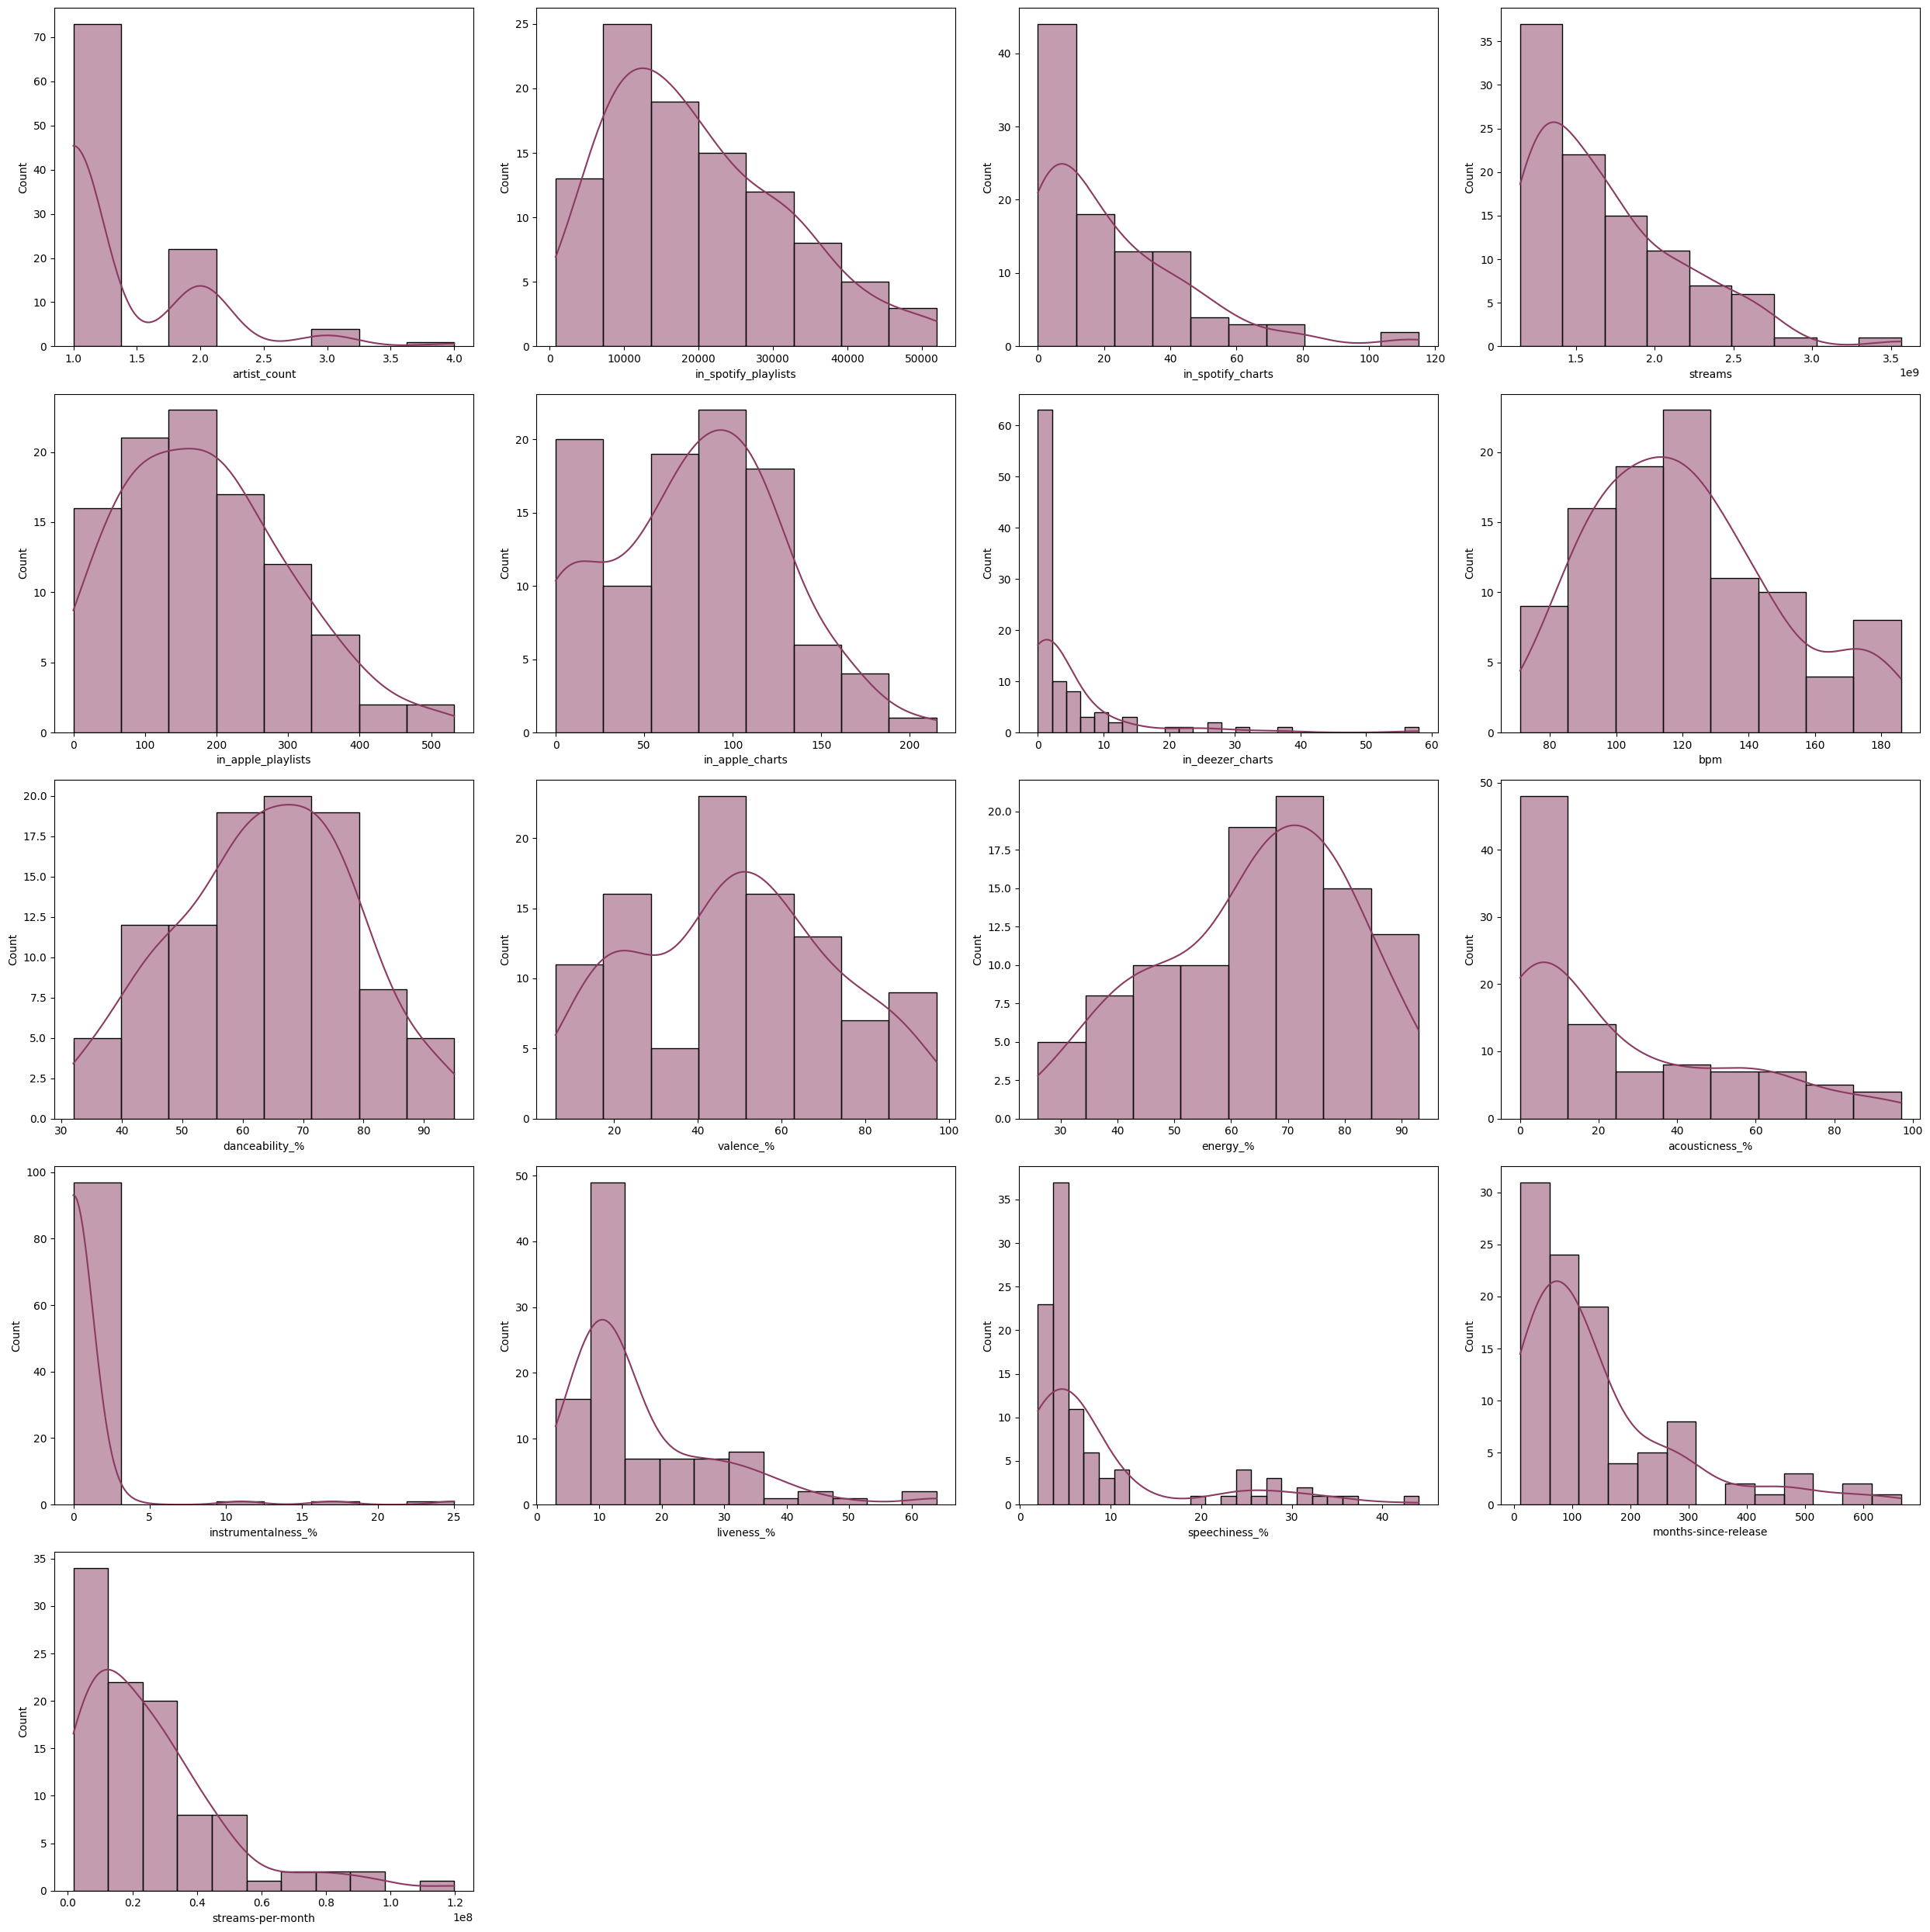

In [64]:
# Selecting numerical columns from the top 10 songs
df_num_top_10 = top_10_songs.select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows needed for subplots
num_cols = df_num_top_10.shape[1]
# Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(df_num_top_10.columns):
    sns.histplot(data=df_num_top_10, x=col, kde=True, color='#8B3A62', ax=axes[i])

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Similar results as earlier

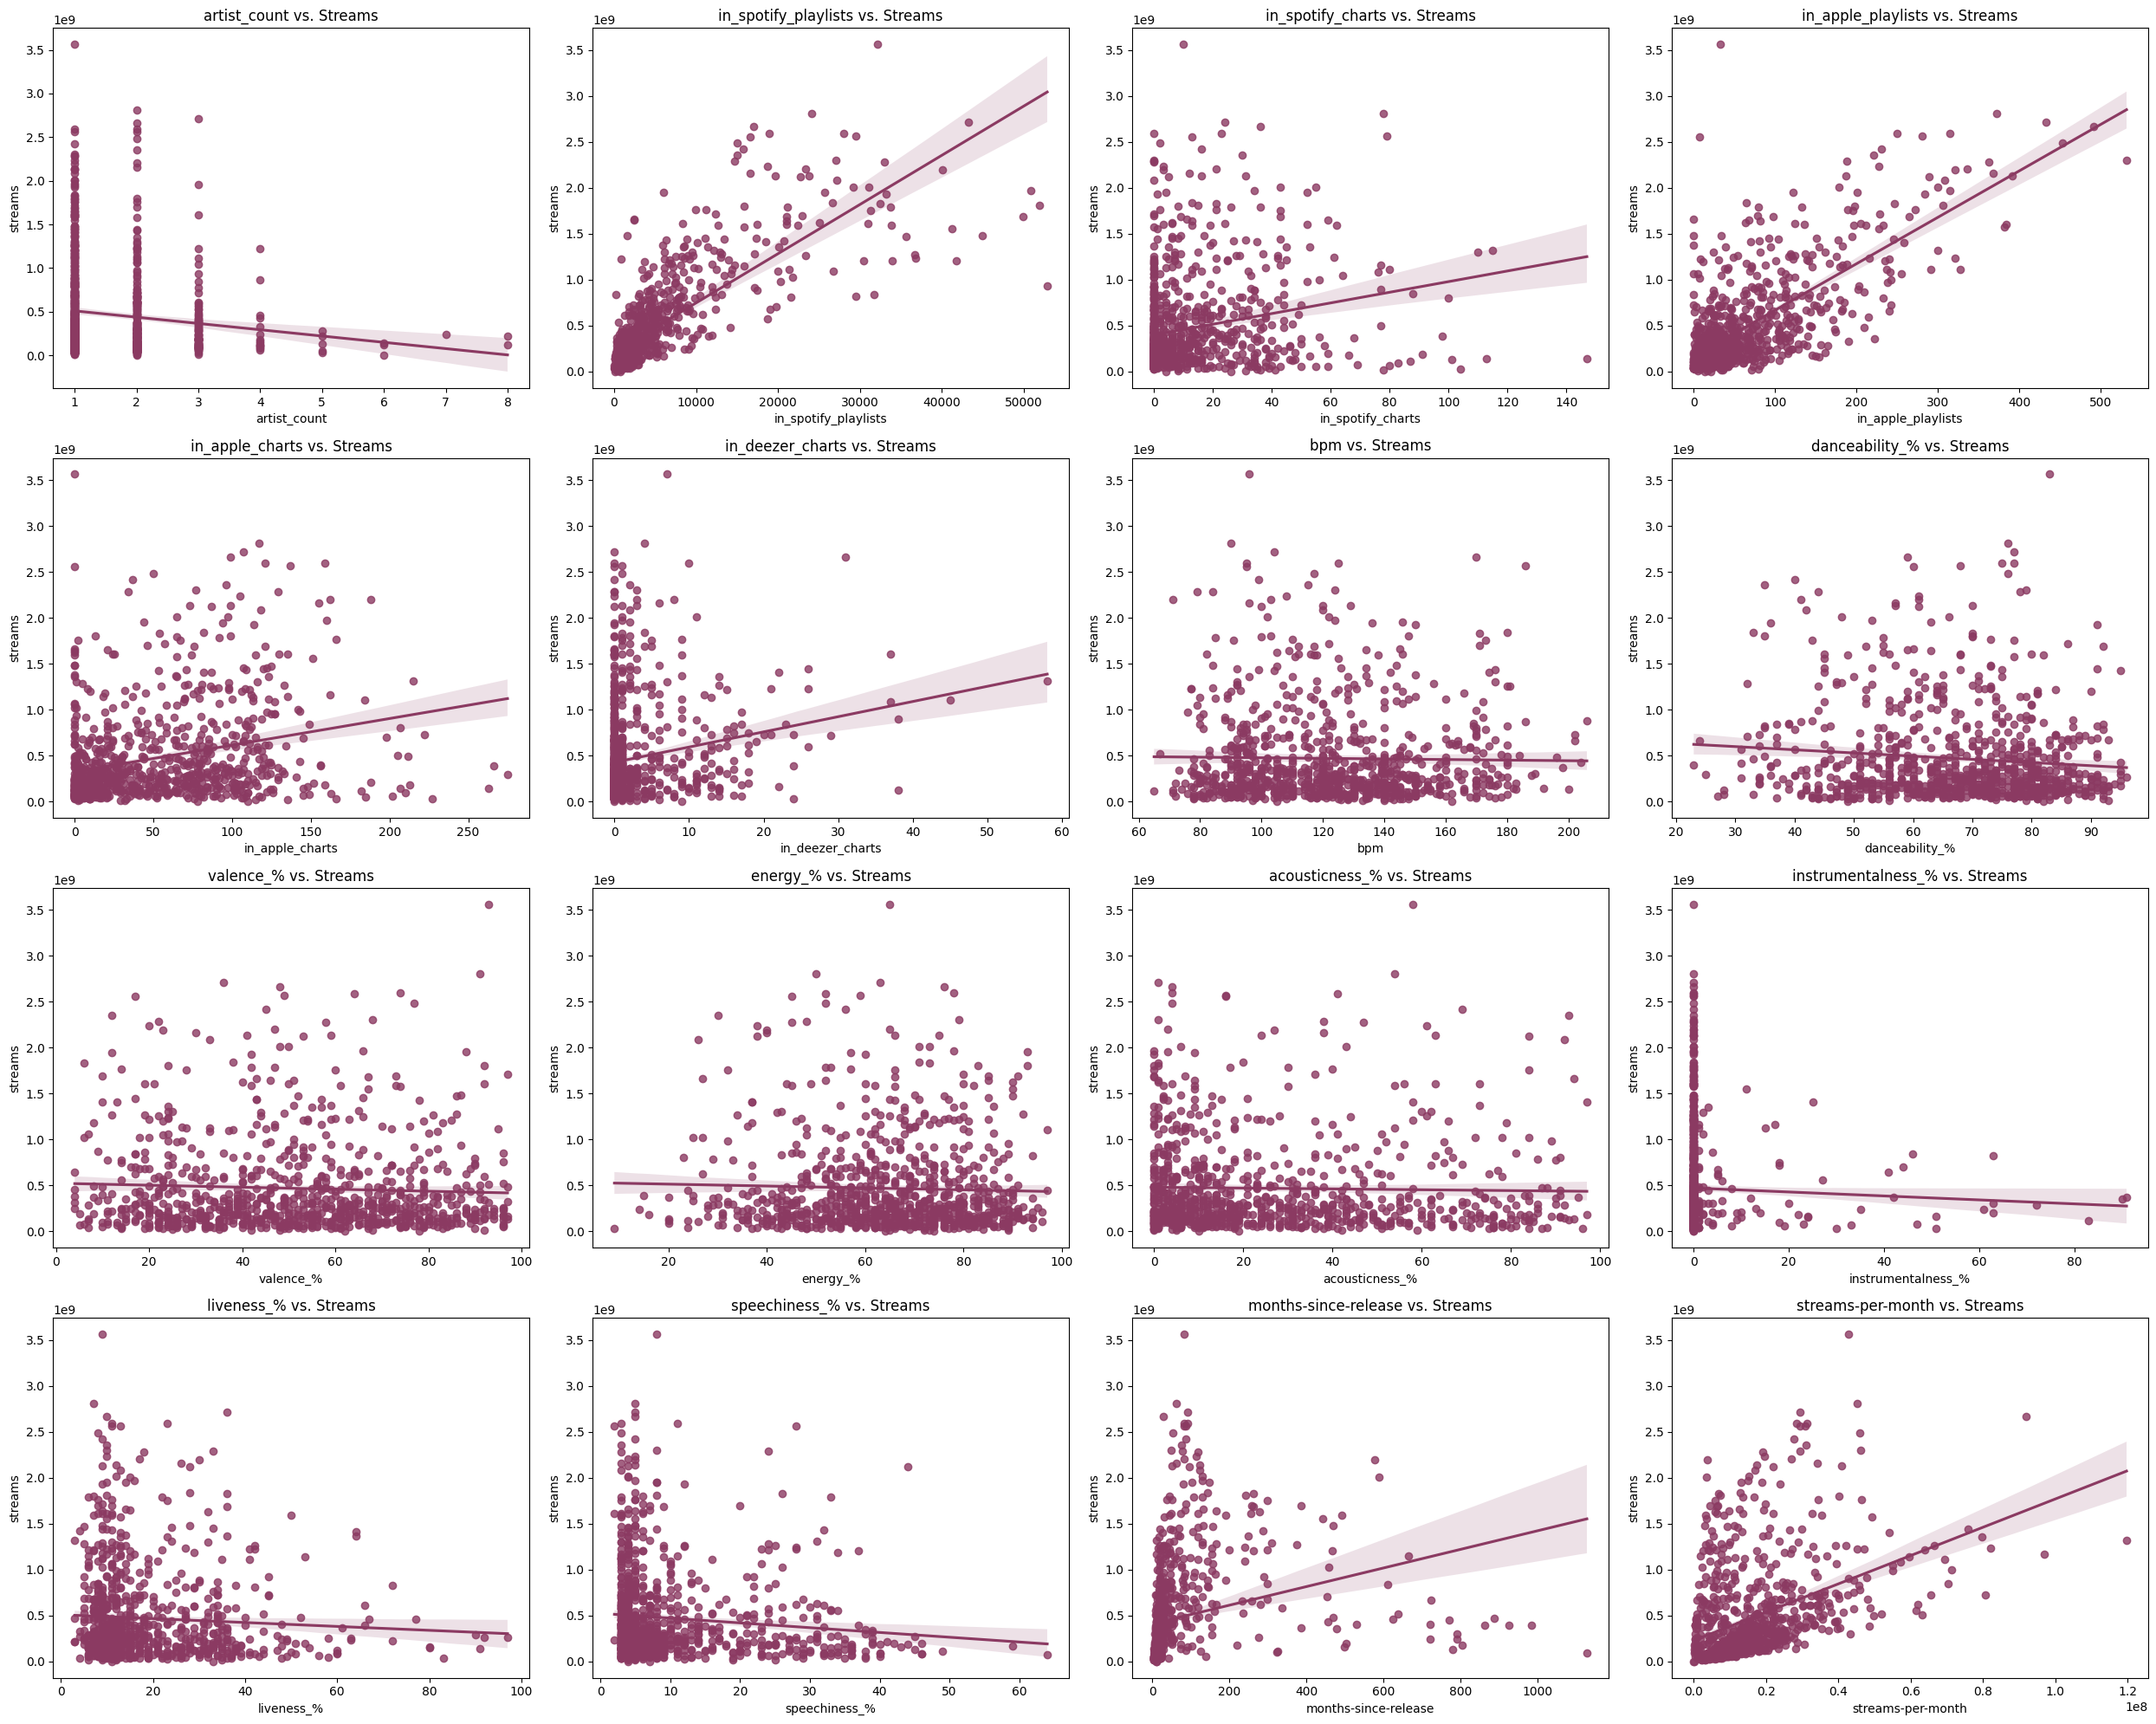

In [65]:
# Select numerical columns except 'streams'
df_num_top_10 = df.select_dtypes(include=['float64', 'int64'])
df_num_top_10 = df_num_top_10.drop(columns=['streams'], errors='ignore')

# Calculate the number of rows needed for subplots
num_cols = df_num_top_10.shape[1]
# Adding 3 ensures that we round up
num_rows = (num_cols + 3) // 4

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a regplot for each
for i, col in enumerate(df_num_top_10.columns):
    sns.regplot(data=df, x=col, y='streams', color='#8B3A62', ax=axes[i])
    axes[i].set_title(f'{col} vs. Streams')

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Same results in regards to the Top 1000, Top 500, and Top 100 songs graphs

# What Makes a Song on Spotify Popular?

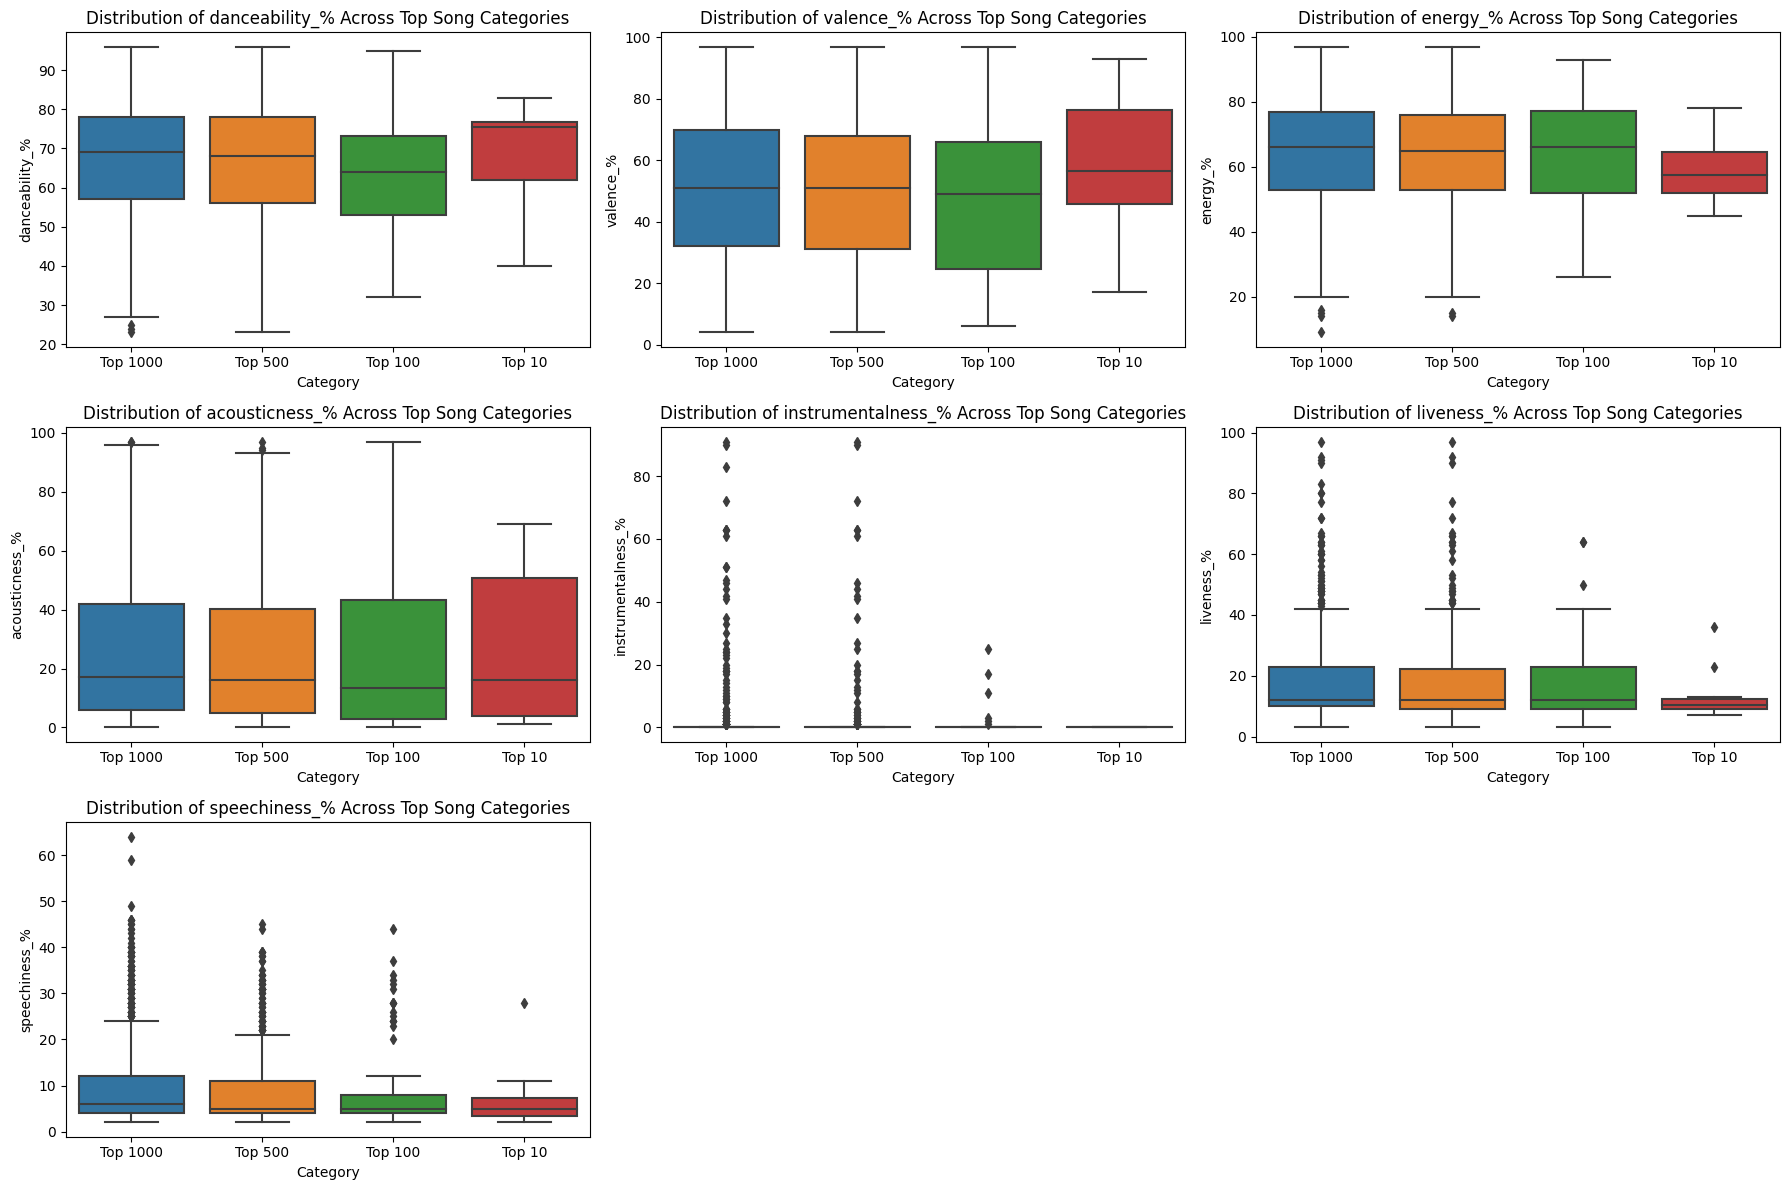

In [66]:
# Preparing data for top 1000, 500, 100, and 10
top_1000 = df.sort_values(by='streams', ascending=False).head(1000)
top_500 = df.sort_values(by='streams', ascending=False).head(500)
top_100 = df.sort_values(by='streams', ascending=False).head(100)
top_10 = df.sort_values(by='streams', ascending=False).head(10)

# Combine all data into a single DataFrame with an additional 'Category' column
top_1000['Category'] = 'Top 1000'
top_500['Category'] = 'Top 500'
top_100['Category'] = 'Top 100'
top_10['Category'] = 'Top 10'

combined_df = pd.concat([top_1000, top_500, top_100, top_10])

# List of features to plot
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Setting up a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the features and create a box plot for each
for i, feature in enumerate(features):
    sns.boxplot(data=combined_df, x='Category', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} Across Top Song Categories')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(feature)

# Hide the last two unused subplots
axes[-1].set_visible(False)  # Hides the last subplot
axes[-2].set_visible(False)  # Hides the second to last subplot

plt.tight_layout()
plt.show()



While most of the results yield similar median values, some key aspects to note from the results is the danceability, valence, and energy.
For instance, songs that are higher in danceability have a higher chance of being in the top 10 songs, This applies for valence as well. However, it was surprising to see that songs that have a lower percentage in energy are more likely to be in the top 10.

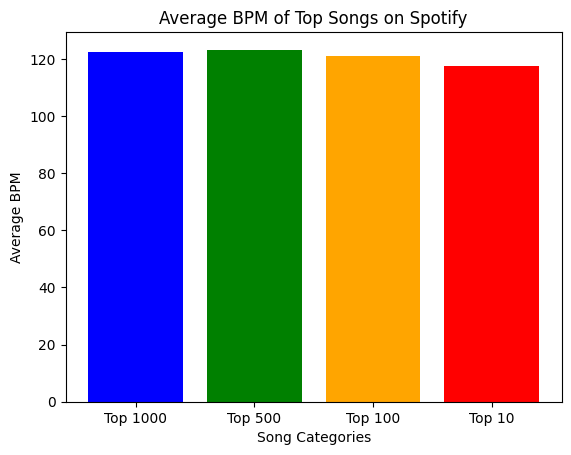

In [67]:
# Sorting the DataFrame based on 'streams' to get the most popular songs
sorted_df = df.sort_values(by='streams', ascending=False)

# Selecting the top 1000, top 500, top 100, and top 10 songs
top_1000_songs = sorted_df.head(1000)
top_500_songs = sorted_df.head(500)
top_100_songs = sorted_df.head(100)
top_10_songs = sorted_df.head(10)

# Calculating the average BPM for each category
avg_bpm_top_1000 = top_1000_songs['bpm'].mean()
avg_bpm_top_500 = top_500_songs['bpm'].mean()
avg_bpm_top_100 = top_100_songs['bpm'].mean()
avg_bpm_top_10 = top_10_songs['bpm'].mean()

# Creating a bar graph to depict the findings
categories = ['Top 1000', 'Top 500', 'Top 100', 'Top 10']
avg_bpms = [avg_bpm_top_1000, avg_bpm_top_500, avg_bpm_top_100, avg_bpm_top_10]

plt.bar(categories, avg_bpms, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Song Categories')
plt.ylabel('Average BPM')
plt.title('Average BPM of Top Songs on Spotify')
plt.show()

While the average BPM does not change drastically from each category, it is a strong point to know that if you do want to have a song in the Top 1000, you should have a BPM around 120.

# Spotify API Use


In [68]:
!pip install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'd829dc20708149e997f703a206f9a553'
client_secret = '231b17f62da34418bfd30443d69236ec'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [38]:
def get_artist_id(artist_name):
    results = sp.search(q='artist:' + artist_name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
      # Return the artist ID of the first result
        return items[0]['id']
    return None

# Apply this function to your DataFrame
df['artist_id'] = df['artist(s)_name'].apply(get_artist_id)

def get_related_artists(artist_id):
    if artist_id:
        related_artists = sp.artist_related_artists(artist_id)
        return [artist['name'] for artist in related_artists['artists']]
    return []

df['related_artists'] = df['artist_id'].apply(get_related_artists)


In [69]:
df['artists'] = df['artist(s)_name'].str.split(',')
df_exploded = df.explode('artists')

artist_song_count = df_exploded['artists'].value_counts()
top_8_artists = artist_song_count.head(8).index.tolist()

top_artists_ids = {artist: get_artist_id(artist) for artist in top_8_artists}

top_artists_related = {artist: get_related_artists(artist_id) for artist, artist_id in top_artists_ids.items()}

for artist, related_artists in top_artists_related.items():
    print(f"Top 3 related artists for {artist}: {related_artists[:3]}")


Top 3 related artists for Taylor Swift: ['Selena Gomez', 'Olivia Rodrigo', 'Katy Perry']
Top 3 related artists for The Weeknd: ['SZA', 'The Neighbourhood', 'Lana Del Rey']
Top 3 related artists for Bad Bunny: ['Rauw Alejandro', 'Feid', 'Myke Towers']
Top 3 related artists for SZA: ['Summer Walker', 'H.E.R.', 'Jhené Aiko']
Top 3 related artists for Kendrick Lamar: ['A$AP Rocky', 'J. Cole', 'Baby Keem']
Top 3 related artists for Drake: ['Future', '21 Savage', 'J. Cole']
Top 3 related artists for Feid: ['Mora', 'Ryan Castro', 'Quevedo']
Top 3 related artists for Harry Styles: ['Louis Tomlinson', 'Niall Horan', 'Liam Payne']
